Lets read data

In [2]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import numpy as np
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from os import listdir
from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import sklearn.linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV


Using TensorFlow backend.


In [4]:
from google.colab import files
uploaded = files.upload()

Saving Dataset1.pkl to Dataset1.pkl
Saving label3.csv to label3.csv


**Data separation**

In [5]:
import pickle 
import numpy as np
import pandas as pd
pickle_in = open("Dataset1.pkl","rb")
example_dict = pickle.load(pickle_in)
data=np.copy(example_dict)
data.shape

(40, 32, 315)

In [6]:
v=data[0,:,:].reshape(-1)
for i in range(1,40):
    v=np.vstack((v,data[i,:,:].reshape(-1)))
X1=np.copy(v)
X1.shape

(40, 10080)

<font color='green'> target(label) for classification

In [0]:
a=pd.read_csv('label3.csv',index_col=None)
y1=a['Label'].to_numpy()
y3=np.repeat(y1,480)
y2=np.repeat(y1,15)

In [8]:
d=[]
c=data[:,:,0:21]
c = np.transpose(c,axes=[0,2,1])
c = c.reshape(40,-1)
for i in range(1,15):
    a=data[:,:,21*i:21*i+21]
    a = np.transpose(a,axes=[0,2,1])
    a = a.reshape(40,-1)
    c=np.vstack((c,a))
X2=c
X2.shape

(600, 672)

In [9]:
arr3=np.empty([0,21])
for i in range(0,data.shape[0]):
    for j in range(0,data.shape[1]):
        for k in range(0,15):
            X3=data[i,j,21*k:21*(k+1)]
            arr3=np.vstack((arr3,X3))
X3=arr3
X3.shape

(19200, 21)

<font color='green'> target(label) for regression

In [0]:
a=pd.read_csv('label3.csv',index_col=None)
y1_reg_v=a['Valence'].to_numpy()
y3_reg_v=np.repeat(y1_reg_v,480)
y2_reg_v=np.repeat(y1_reg_v,15)
y1_reg_a=a['Arousal'].to_numpy()
y3_reg_a=np.repeat(y1_reg_a,480)
y2_reg_a=np.repeat(y1_reg_a,15)

In [0]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression,SelectKBest,mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor
cv_kfold =KFold(n_splits=4)
def visualize(X, y):
    X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y, c='r')
##############################################################
# feature extraction using KBest 
def feature_extraction(X,y):
    X = SelectKBest(f_regression,k=3).fit_transform(X, y)
    return X
##############################################################
#center & normalize data
def data_cleaning(X):
    for i in range(0, X.shape[1]):
        X[:,i] = X[:, i] - np.mean(X[:,i])
        X[:,i] = X[:,i] / np.linalg.norm(X[:,i], 2)
    pca = PCA(n_components=0.9)
    pca.fit(X)
    X = pca.transform(X)
    print('%d number of components remain for 95 percent energy in PCA.'%X.shape[1])
    return X
##############################################################
def AdaBoost():
    parameters1 = {'max_depth': [3,5,7]}
    parameters2 = {'n_estimators': [5,10,50,100]}
    model1 = DecisionTreeRegressor(criterion = 'mae')
    # model1 = sklearn.linear_model.Lasso(fit_intercept=True)
    # parameters1 = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    # model = sklearn.linear_model.Lasso(fit_intercept=True)
    base_regr = GridSearchCV(model1, parameters1, cv=cv_kfold)
    model2 = AdaBoostRegressor(base_estimator = model1,learning_rate =1,loss='exponential')
    regr = GridSearchCV(model2, parameters2, cv=cv_kfold)
    return regr
##############################################################
def lin_reg():
    regr = sklearn.linear_model.LinearRegression(fit_intercept=True)
    return regr
##############################################################
def ridge_reg():
    parameters = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100,1000]}
    model = sklearn.linear_model.Ridge(fit_intercept=True)
    regr = GridSearchCV(model, parameters, cv=cv_kfold)
    return regr
##############################################################
def lasso_reg():
    parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
    model = sklearn.linear_model.Lasso(fit_intercept=True)
    regr = GridSearchCV(model, parameters, cv=cv_kfold)
    return regr
##############################################################
def poly2_reg():
  regr=make_pipeline(PolynomialFeatures(2), Ridge(fit_intercept=True))
  return regr


def poly3_reg():
  regr=make_pipeline(PolynomialFeatures(3), Ridge(fit_intercept=True))
  return regr


##############################
def poly4_reg():
  regr=make_pipeline(PolynomialFeatures(4), Ridge(fit_intercept=True))
  return regr

def poly5_reg():
  regr=make_pipeline(PolynomialFeatures(5), Ridge(fit_intercept=True))
  return regr
 ############################################################## 
def svr():
    parameters = {'C': [0.01, 0.1], 'epsilon': [0.1, 0.5],'kernel':['rbf','linear']}
    model = SVR(gamma='scale' )
    regr = GridSearchCV(model, parameters, cv=cv_kfold)
    return regr
##############################################################
def KNN_reg():
    parameters = {'n_neighbors': [2, 4, 6, 8, 10, 15, 20]}
    model = KNeighborsRegressor()
    regr = GridSearchCV(model, parameters, cv=cv_kfold)
    return regr
##############################################################
def random_forest():
    parameters = {'max_depth': [2,4,6,8], 'n_estimators': [10,20,40,60,80]}
    model = RandomForestRegressor(bootstrap=True, criterion='mae', max_features='sqrt')
    regr = GridSearchCV(model, parameters, cv=cv_kfold)
    return regr
def cross_validation(X,y,regr):
  kfold =KFold(n_splits=5)
  mae_CV = 0
  for train_index,test_index in kfold.split(X,y):
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    regr.fit(X_train,y_train)
    y_hat = regr.predict(X_test)
    mae = (abs(y_hat - y_test)).sum()
    mae_CV = mae_CV + mae
    #Plot the results
    plt.figure()
    plt.plot(y_test, c="g", label="Actual range", linewidth=1)
    plt.plot(y_hat, c="r", label="Estimated range with this model", linewidth=1)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.legend()
    plt.show() 
  return mae_CV/len(y)

18 number of components remain for 95 percent energy in PCA.


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


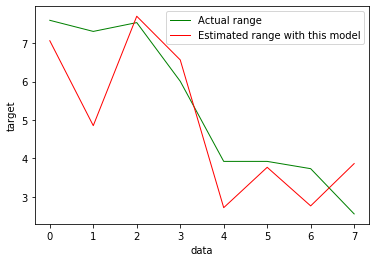

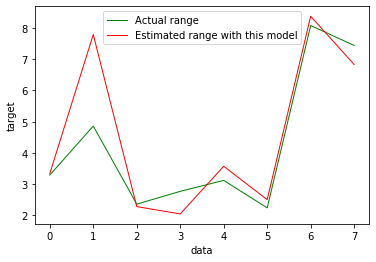

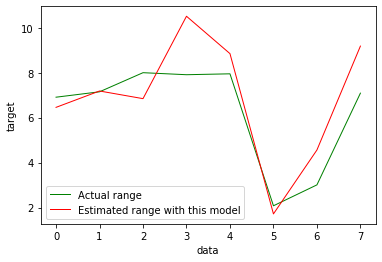

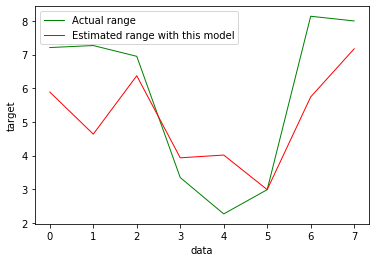

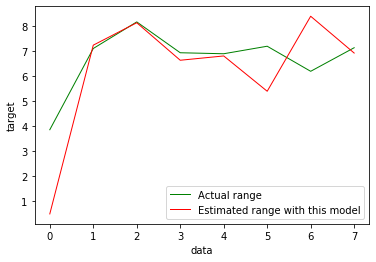


MAE of LinReg is = 1.002672


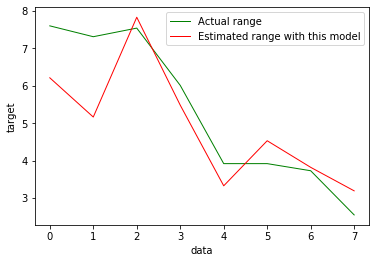

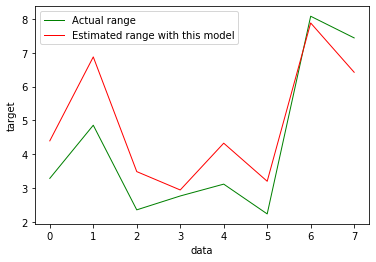

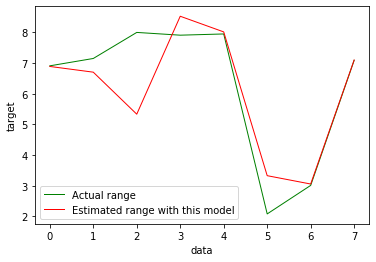

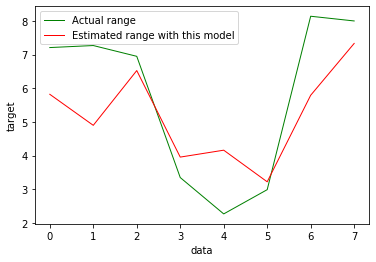

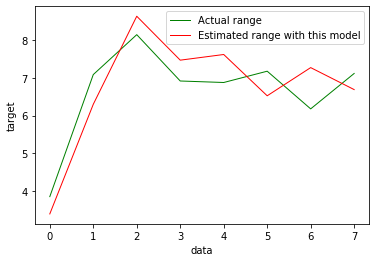


MAE of Ridge is = 0.859211
Best hyper-params for Ridge due to CV:
{'alpha': 1}


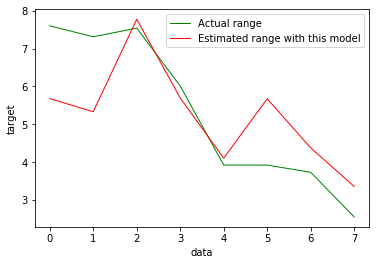

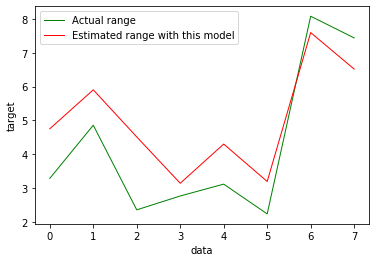

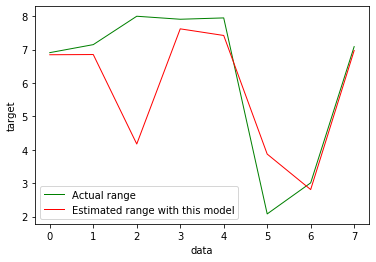

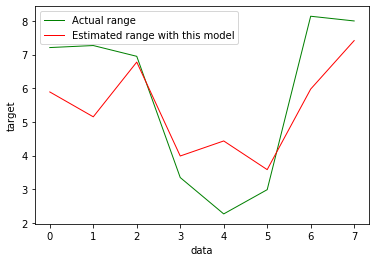

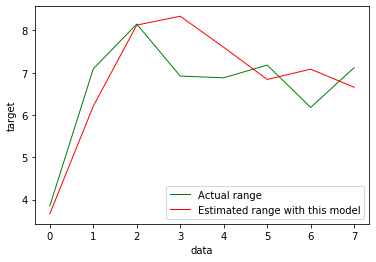


MAE of Lasso is = 0.955645
Best hyper-params for Lasso due to CV:
{'alpha': 0.1}


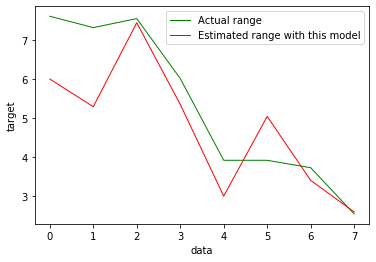

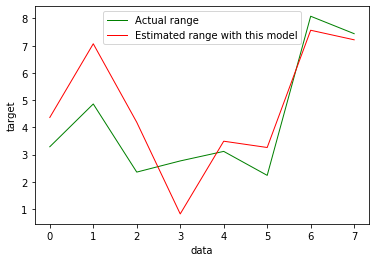

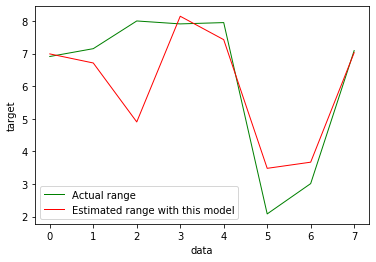

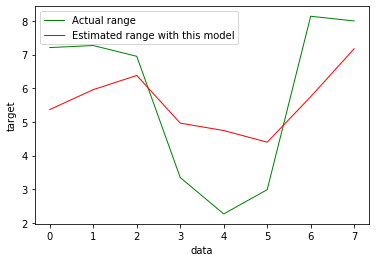

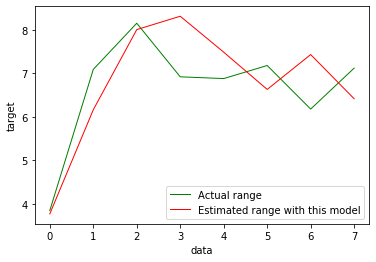


MAE of polynomial reg2 is = 1.014250


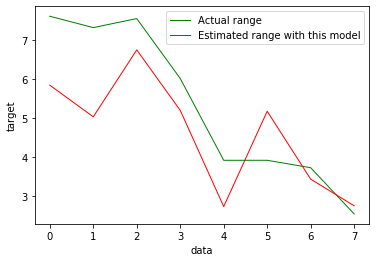

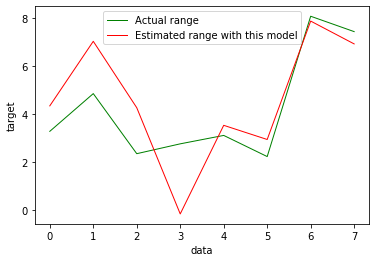

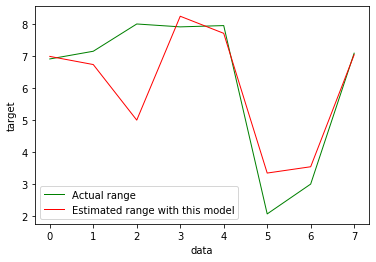

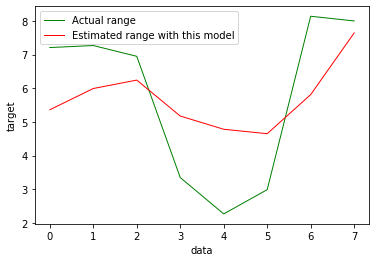

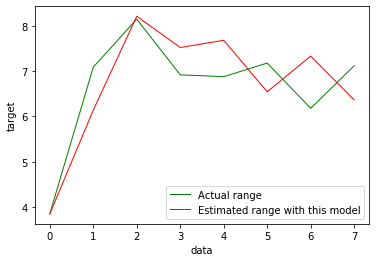


MAE of polynomial reg3 is = 1.047573


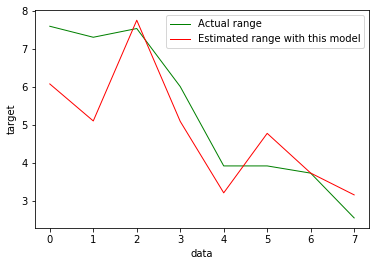

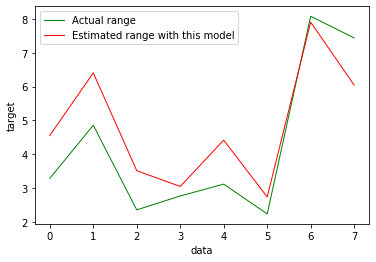

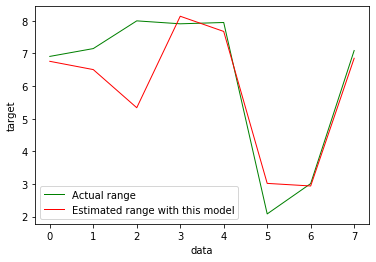

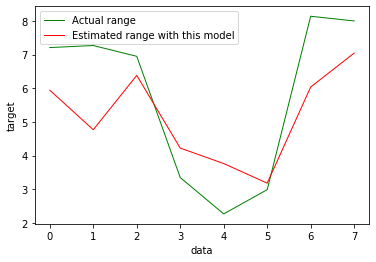

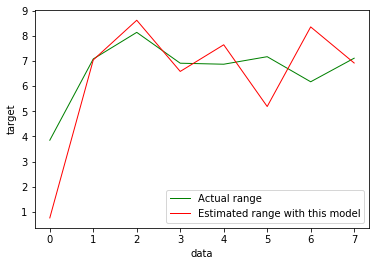


MAE of SVR is = 0.972685
Best hyper-params for SVR due to CV:
{'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}


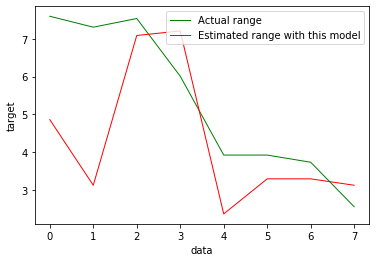

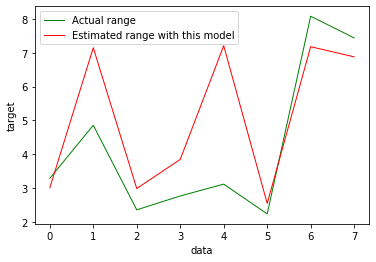

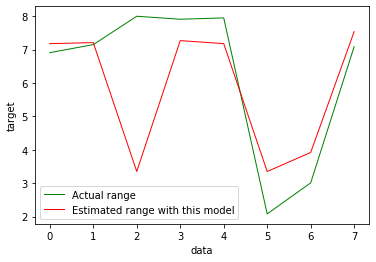

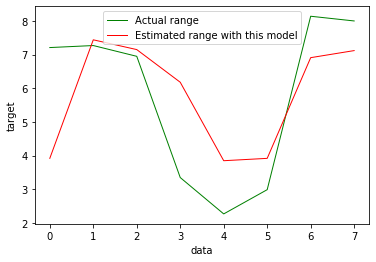

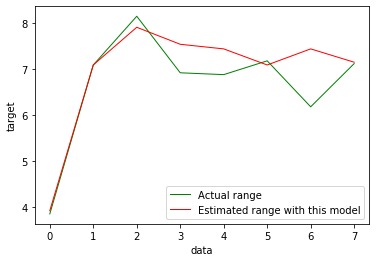


MAE of AdaBoost is = 1.123000
Best hyper-params for Adaboost due to CV:
{'n_estimators': 100}


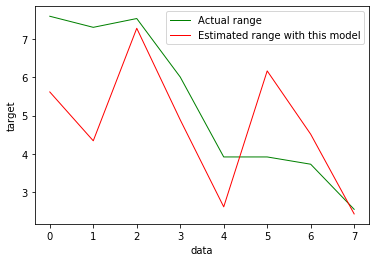

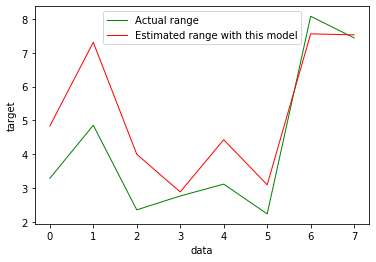

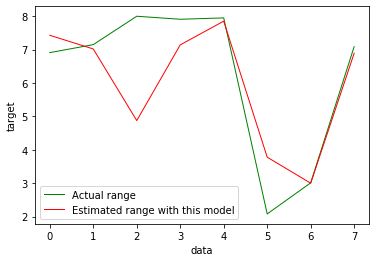

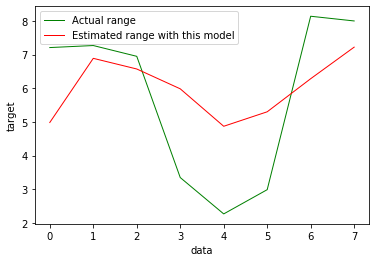

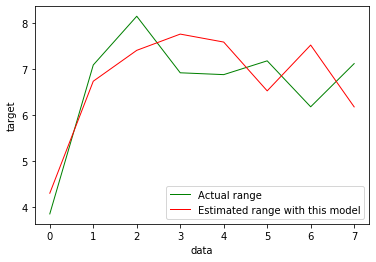


MAE of KNN is = 1.126677
Best hyper-params for KNN due to CV:
{'n_neighbors': 6}


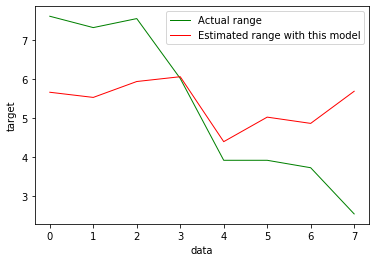

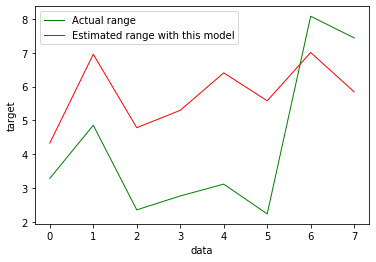

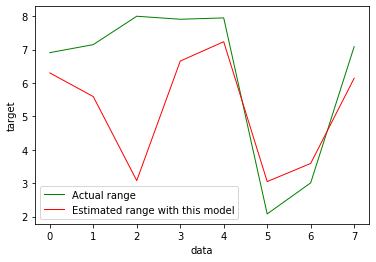

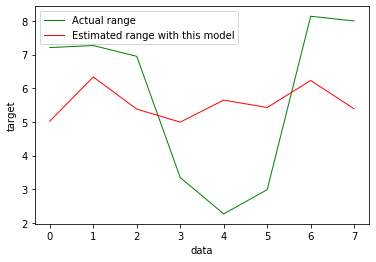

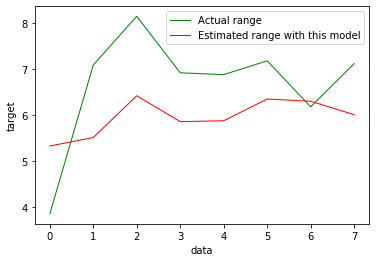


MAE of RandomForest is = 1.643630
Best hyper-params for RandomForest due to CV:
{'max_depth': 12, 'n_estimators': 100}


In [17]:
def main():
    X=X1
    y=y1_reg_a
    X = feature_extraction(X,y)
    X = data_cleaning(X)
    regr = lin_reg()
    MAE_linreg = cross_validation(X,y,regr)
    print('\nMAE of LinReg is = %f' % MAE_linreg)

    regr = ridge_reg()
    MAE_ridge = cross_validation(X,y,regr)
    print('\nMAE of Ridge is = %f' %  MAE_ridge)
    print('Best hyper-params for Ridge due to CV:')
    print(regr.best_params_)

    regr = lasso_reg()
    MAE_lasso = cross_validation(X,y,regr)
    print('\nMAE of Lasso is = %f' % MAE_lasso)
    print('Best hyper-params for Lasso due to CV:')
    print(regr.best_params_)

    regr = poly2_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg2 is = %f' % MAE_poly)


    regr = poly3_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg3 is = %f' % MAE_poly)


    # regr = poly4_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg4 is = %f' % MAE_poly)

    # regr = poly5_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg5 is = %f' % MAE_poly)

    regr = svr()
    MAE_svr = cross_validation(X,y,regr)
    print('\nMAE of SVR is = %f' % MAE_svr)
    print('Best hyper-params for SVR due to CV:')
    print(regr.best_params_)

    regr = AdaBoost()
    MAE_adaboost = cross_validation(X,y,regr)
    print('\nMAE of AdaBoost is = %f' %MAE_adaboost)
    print('Best hyper-params for Adaboost due to CV:')
    print(regr.best_params_)

    regr = KNN_reg()
    MAE_knn = cross_validation(X, y, regr)
    print('\nMAE of KNN is = %f' % MAE_knn)
    print('Best hyper-params for KNN due to CV:')
    print(regr.best_params_)

    regr = random_forest()
    MAE_forest = cross_validation(X, y, regr)
    print('\nMAE of RandomForest is = %f' % MAE_forest)
    print('Best hyper-params for RandomForest due to CV:')
    print(regr.best_params_)
##############################################################
main()

24 number of components remain for 95 percent energy in PCA.


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


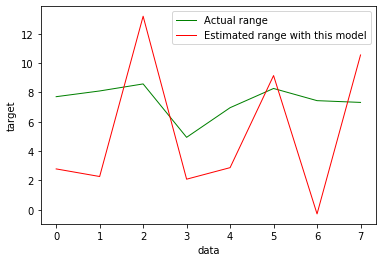

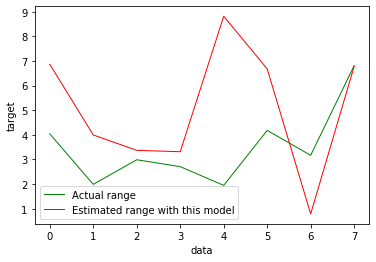

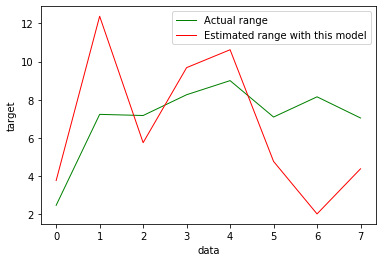

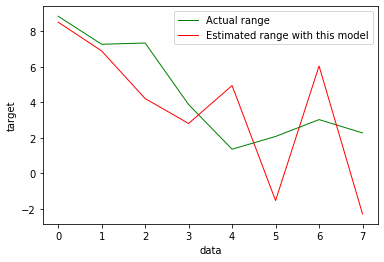

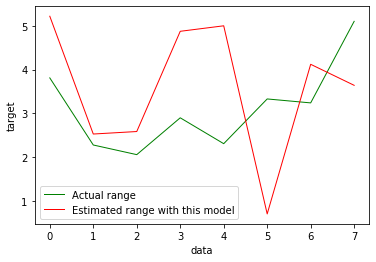


MAE of LinReg is = 2.632371


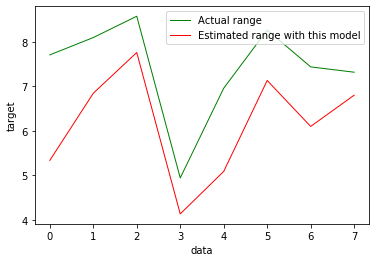

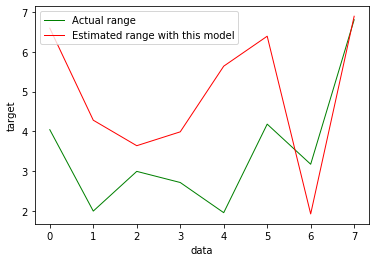

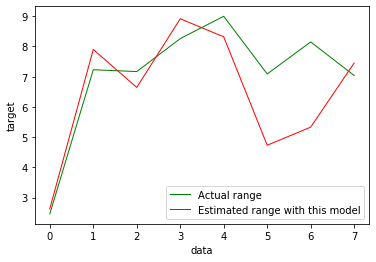

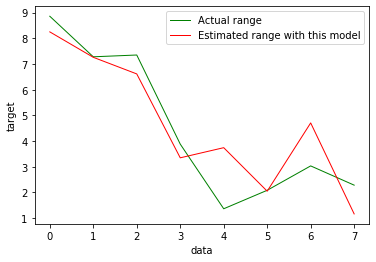

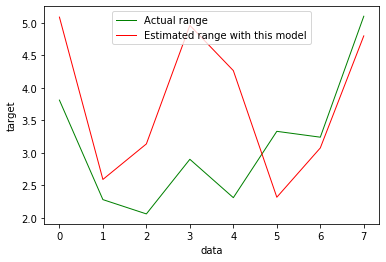


MAE of Ridge is = 1.192307
Best hyper-params for Ridge due to CV:
{'alpha': 1}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03560946004890327, tolerance: 0.015589399583333335
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017989508577770832, tolerance: 0.012728249583333334
  positive)


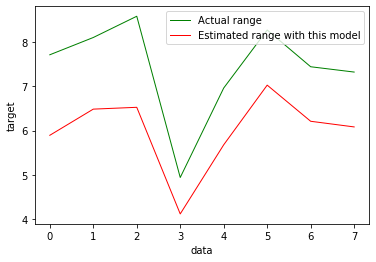

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03560946004890327, tolerance: 0.015589399583333335
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015351238021787506, tolerance: 0.013391839583333334
  positive)


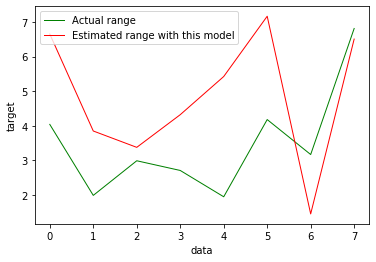

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0600281806207022, tolerance: 0.015099233333333332
  positive)


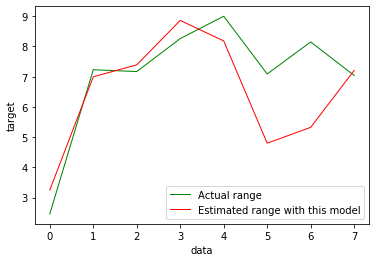

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017989508577770832, tolerance: 0.012728249583333334
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015351238021787506, tolerance: 0.013391839583333334
  positive)


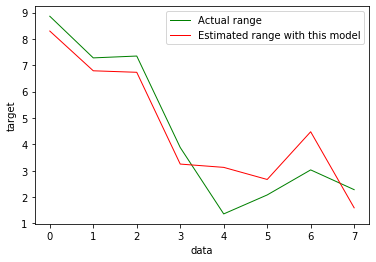

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0600281806207022, tolerance: 0.015099233333333332
  positive)


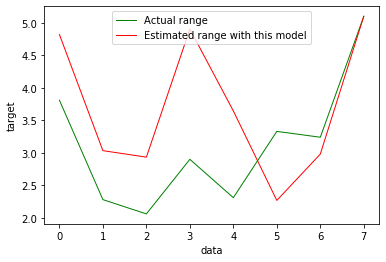


MAE of Lasso is = 1.207148
Best hyper-params for Lasso due to CV:
{'alpha': 0.1}


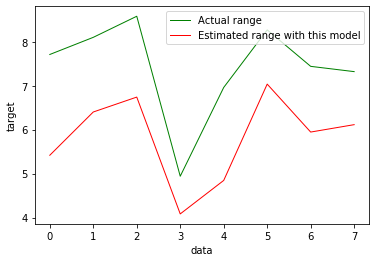

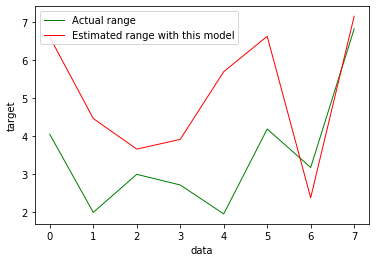

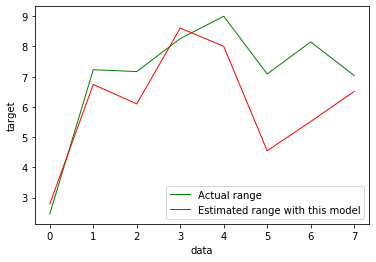

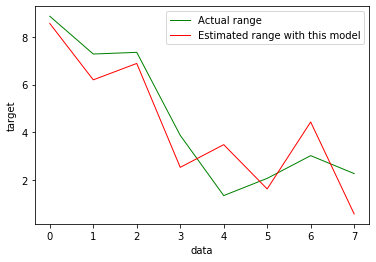

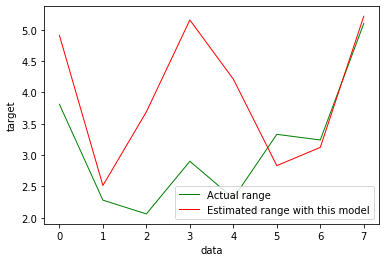


MAE of SVR is = 1.313911
Best hyper-params for SVR due to CV:
{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}


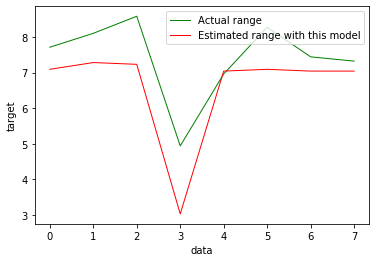

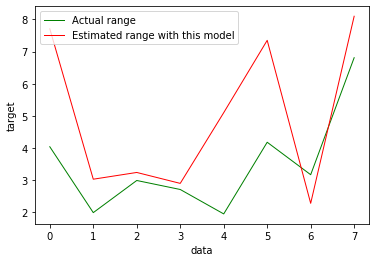

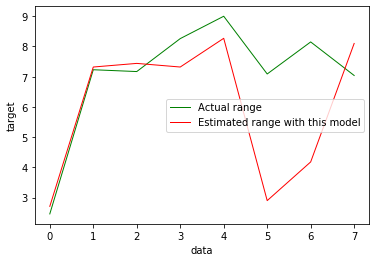

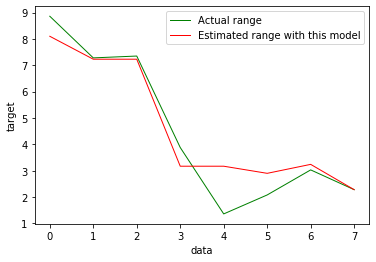

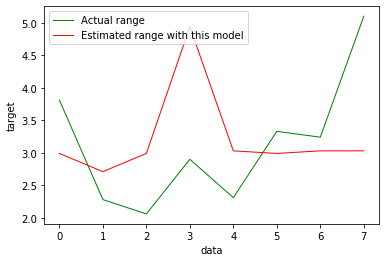


MAE of AdaBoost is = 1.095750
Best hyper-params for Adaboost due to CV:
{'n_estimators': 70}


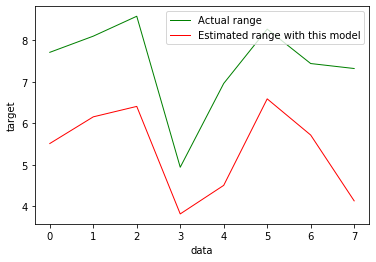

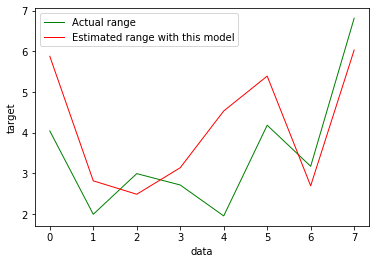

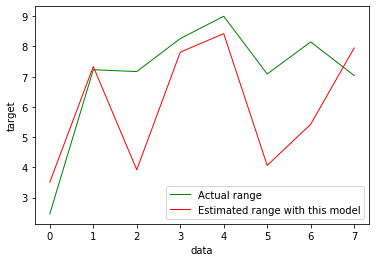

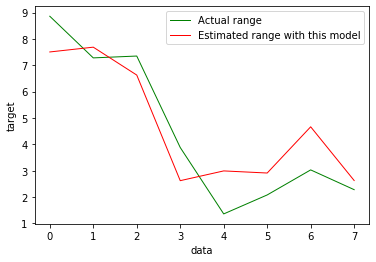

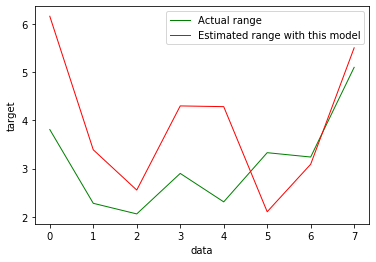


MAE of KNN is = 1.363000
Best hyper-params for KNN due to CV:
{'n_neighbors': 4}


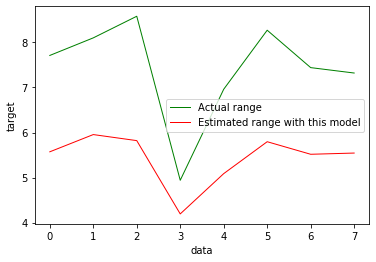

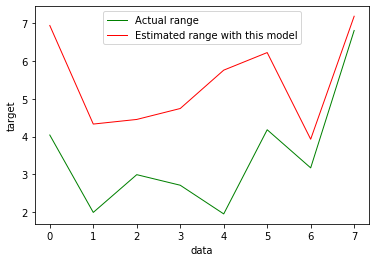

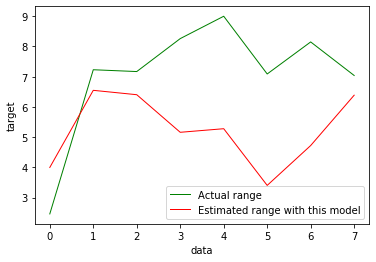

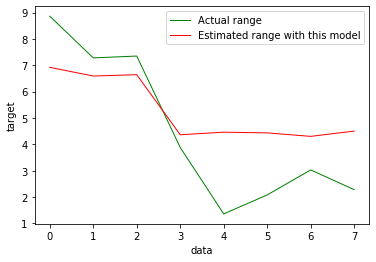

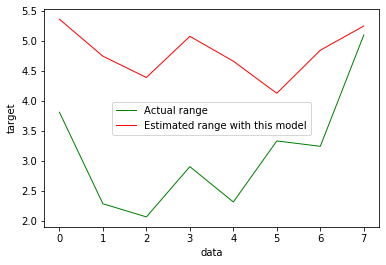


MAE of RandomForest is = 1.883518
Best hyper-params for RandomForest due to CV:
{'max_depth': 10, 'n_estimators': 40}


In [18]:
def main():
    X=X1
    y=y1_reg_v
    # visualize(X, y)
    X = feature_extraction(X,y)
    X = data_cleaning(X)
    regr = lin_reg()
    MAE_linreg = cross_validation(X,y,regr)
    print('\nMAE of LinReg is = %f' % MAE_linreg)

    regr = ridge_reg()
    MAE_ridge = cross_validation(X,y,regr)
    print('\nMAE of Ridge is = %f' % MAE_ridge)
    print('Best hyper-params for Ridge due to CV:')
    print(regr.best_params_)

    regr = lasso_reg()
    MAE_lasso = cross_validation(X,y,regr)
    print('\nMAE of Lasso is = %f' % MAE_lasso)
    print('Best hyper-params for Lasso due to CV:')
    print(regr.best_params_)

    regr = svr()
    MAE_svr = cross_validation(X,y,regr)
    print('\nMAE of SVR is = %f' % MAE_svr)
    print('Best hyper-params for SVR due to CV:')
    print(regr.best_params_)

    regr = AdaBoost()
    MAE_adaboost = cross_validation(X,y,regr)
    print('\nMAE of AdaBoost is = %f' %MAE_adaboost)
    print('Best hyper-params for Adaboost due to CV:')
    print(regr.best_params_)

    regr = KNN_reg()
    MAE_knn = cross_validation(X, y, regr)
    print('\nMAE of KNN is = %f' % MAE_knn)
    print('Best hyper-params for KNN due to CV:')
    print(regr.best_params_)

    regr = random_forest()
    MAE_forest = cross_validation(X, y, regr)
    print('\nMAE of RandomForest is = %f' % MAE_forest)
    print('Best hyper-params for RandomForest due to CV:')
    print(regr.best_params_)
##############################################################
main()

11 number of components remain for 95 percent energy in PCA.


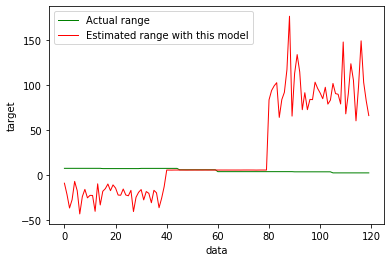

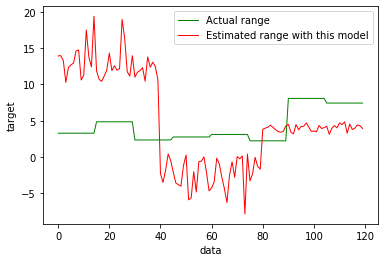

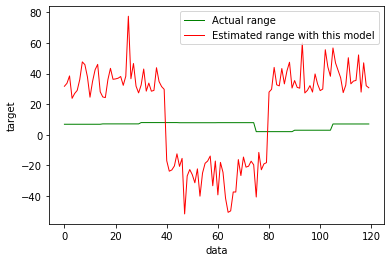

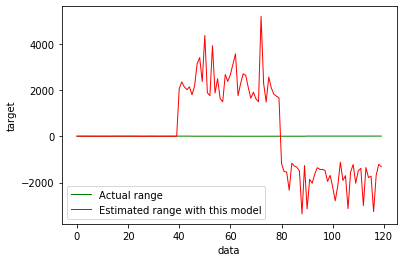

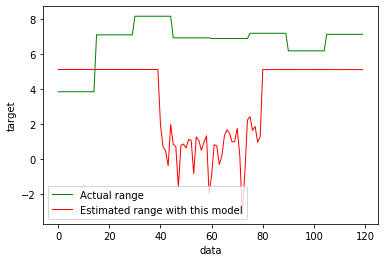


MAE of LinReg is = 295.048801


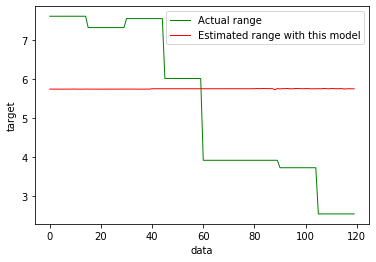

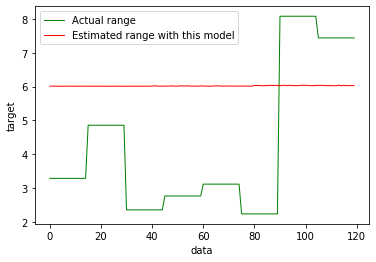

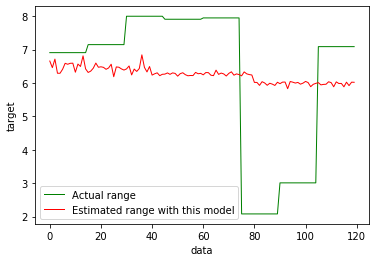

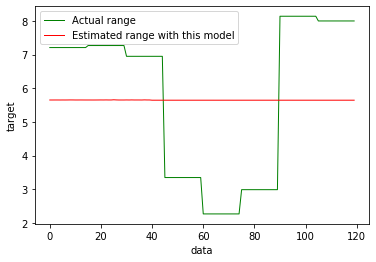

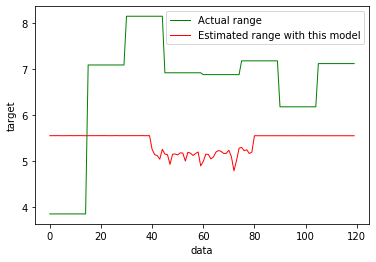


MAE of Ridge is = 2.013063
Best hyper-params for Ridge due to CV:
{'alpha': 10}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.991605707395479, tolerance: 0.14258009374999997
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.3103074572677, tolerance: 0.1710510937500001
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.9767195636366, tolerance: 0.16994459375
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.5402390405879

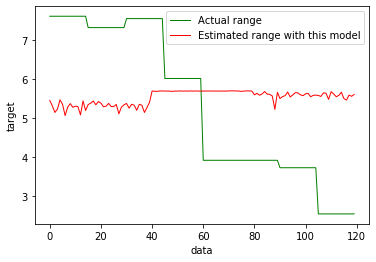

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.991605707395479, tolerance: 0.14258009374999997
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.43858795913832, tolerance: 0.13424699375000004
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.58069071149728, tolerance: 0.12901469374999996
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.247517

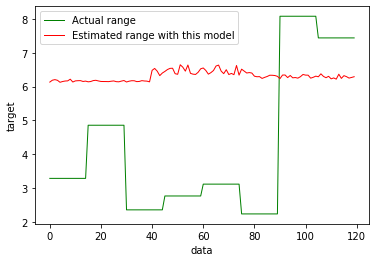

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.3103074572677, tolerance: 0.1710510937500001
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.43858795913832, tolerance: 0.13424699375000004
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.8363644437917, tolerance: 0.15031269375000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.39790760

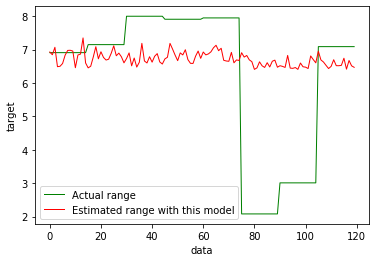

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.9767195636366, tolerance: 0.16994459375
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.58069071149728, tolerance: 0.12901469374999996
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.8363644437917, tolerance: 0.15031269375000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.058684961857

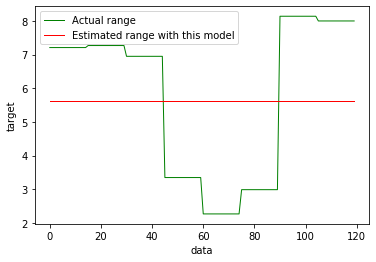

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324.54023904058795, tolerance: 0.20272079999999998
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2475174424641864, tolerance: 0.1693583750000001
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3979076061874594, tolerance: 0.17633029999999997
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.05868

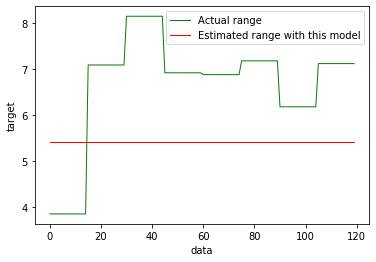


MAE of Lasso is = 2.019728
Best hyper-params for Lasso due to CV:
{'alpha': 1}


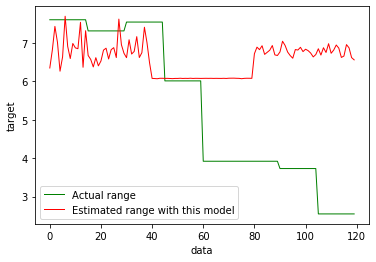

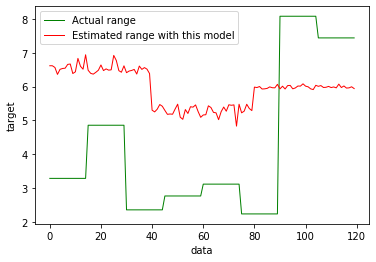

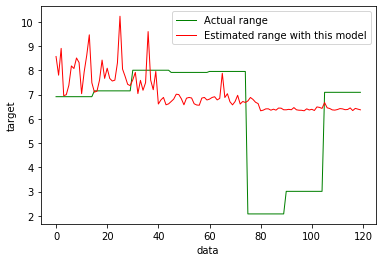

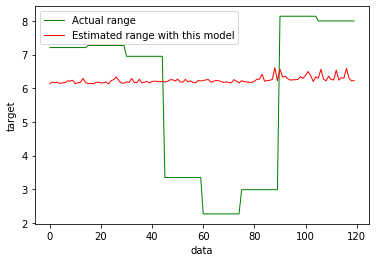

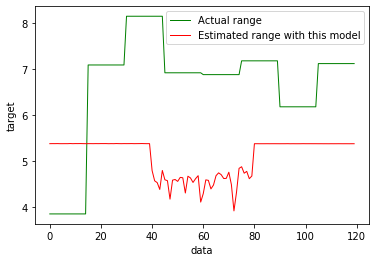


MAE of polynomial reg2 is = 2.004249


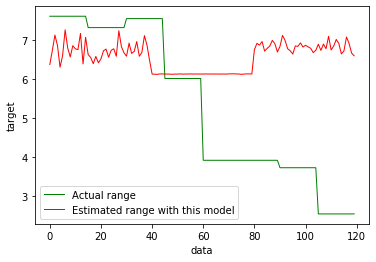

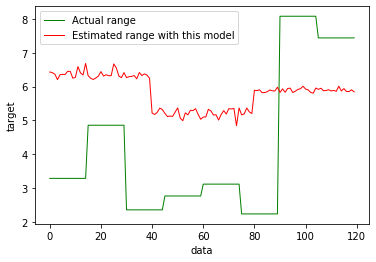

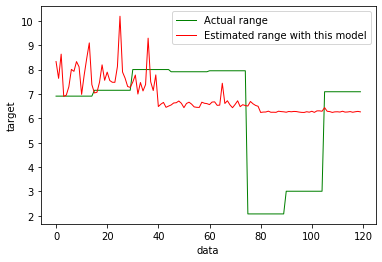

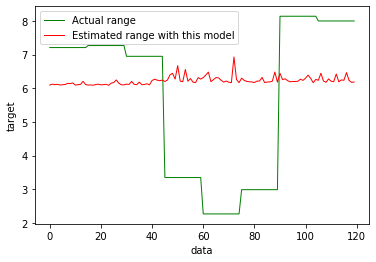

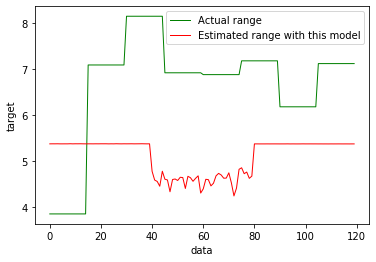


MAE of polynomial reg3 is = 2.014105


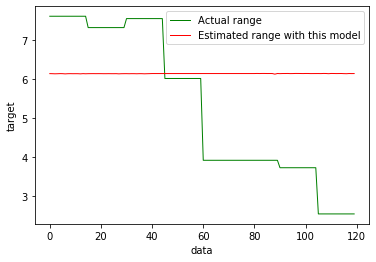

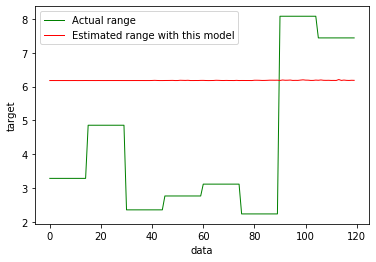

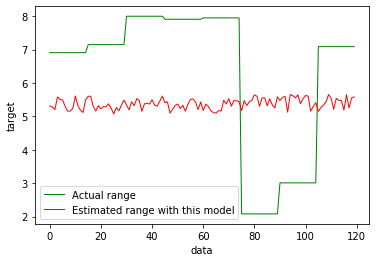

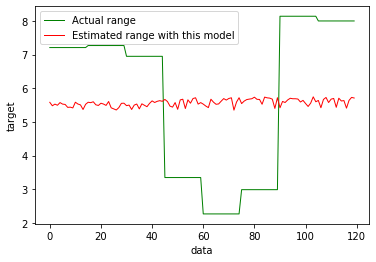

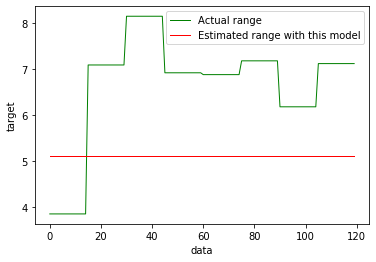


MAE of SVR is = 2.198706
Best hyper-params for SVR due to CV:
{'C': 0.0001, 'epsilon': 5, 'kernel': 'rbf'}


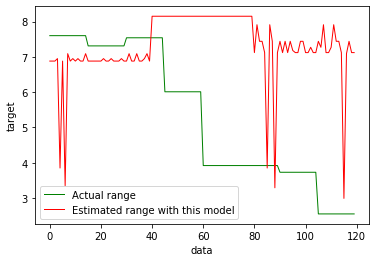

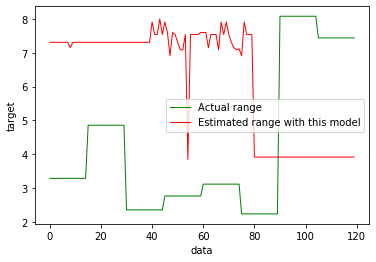

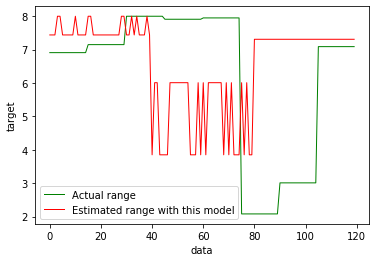

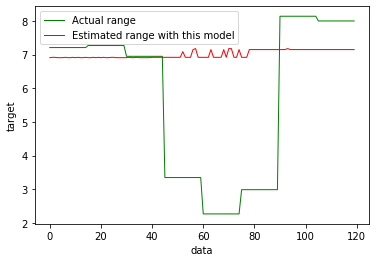

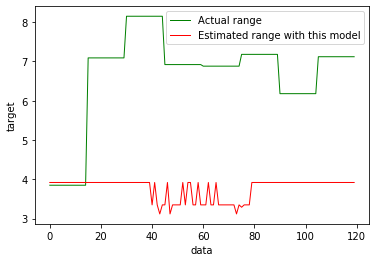


MAE of AdaBoost is = 2.648850
Best hyper-params for Adaboost due to CV:
{'n_estimators': 100}


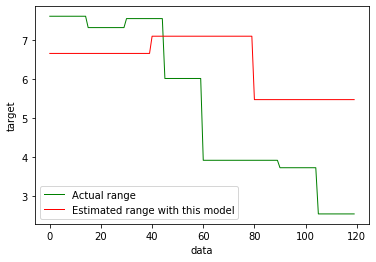

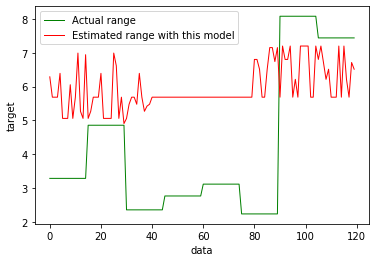

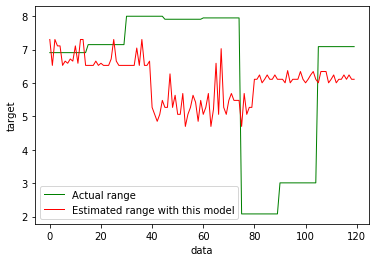

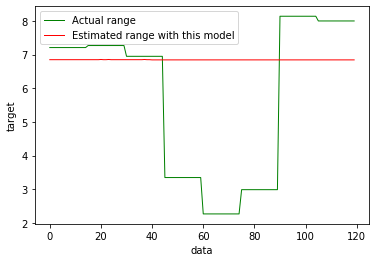

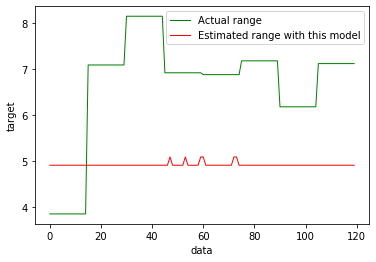


MAE of KNN is = 1.969928
Best hyper-params for KNN due to CV:
{'n_neighbors': 20}


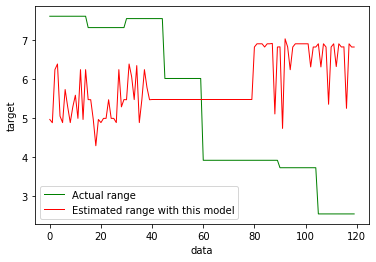

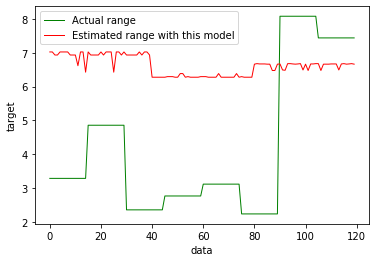

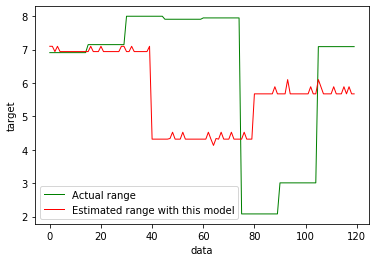

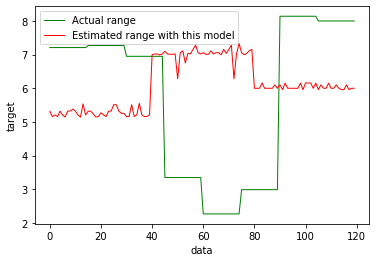

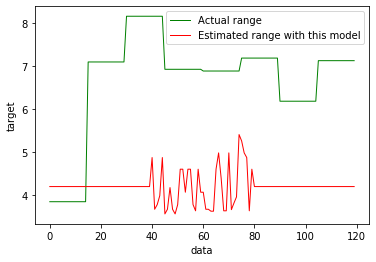


MAE of RandomForest is = 2.471902
Best hyper-params for RandomForest due to CV:
{'max_depth': 12, 'n_estimators': 10}


In [17]:
def main():
    X=X2
    y=y2_reg_a
    X = feature_extraction(X,y)
    X = data_cleaning(X)
    regr = lin_reg()
    MAE_linreg = cross_validation(X,y,regr)
    print('\nMAE of LinReg is = %f' % MAE_linreg)

    regr = ridge_reg()
    MAE_ridge = cross_validation(X,y,regr)
    print('\nMAE of Ridge is = %f' %  MAE_ridge)
    print('Best hyper-params for Ridge due to CV:')
    print(regr.best_params_)

    regr = lasso_reg()
    MAE_lasso = cross_validation(X,y,regr)
    print('\nMAE of Lasso is = %f' % MAE_lasso)
    print('Best hyper-params for Lasso due to CV:')
    print(regr.best_params_)

    regr = poly2_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg2 is = %f' % MAE_poly)


    regr = poly3_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg3 is = %f' % MAE_poly)


    # regr = poly4_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg4 is = %f' % MAE_poly)

    # regr = poly5_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg5 is = %f' % MAE_poly)

    regr = svr()
    MAE_svr = cross_validation(X,y,regr)
    print('\nMAE of SVR is = %f' % MAE_svr)
    print('Best hyper-params for SVR due to CV:')
    print(regr.best_params_)

    regr = AdaBoost()
    MAE_adaboost = cross_validation(X,y,regr)
    print('\nMAE of AdaBoost is = %f' %MAE_adaboost)
    print('Best hyper-params for Adaboost due to CV:')
    print(regr.best_params_)

    regr = KNN_reg()
    MAE_knn = cross_validation(X, y, regr)
    print('\nMAE of KNN is = %f' % MAE_knn)
    print('Best hyper-params for KNN due to CV:')
    print(regr.best_params_)

    regr = random_forest()
    MAE_forest = cross_validation(X, y, regr)
    print('\nMAE of RandomForest is = %f' % MAE_forest)
    print('Best hyper-params for RandomForest due to CV:')
    print(regr.best_params_)
##############################################################
main()

11 number of components remain for 95 percent energy in PCA.


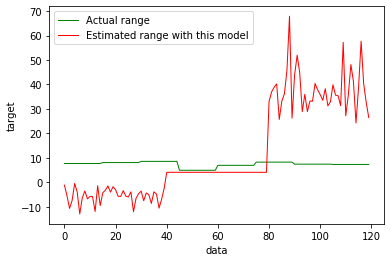

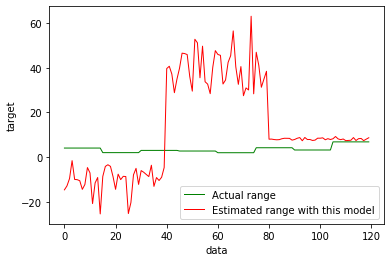

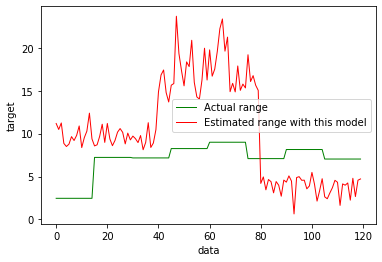

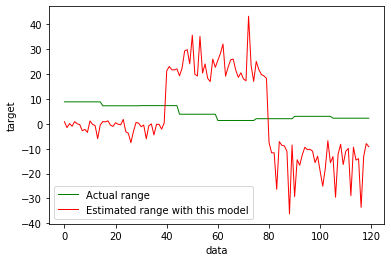

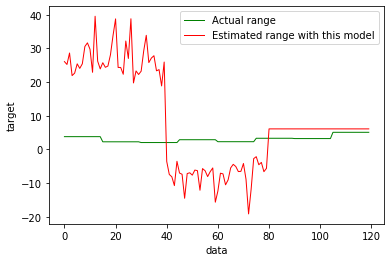


MAE of LinReg is = 13.298979


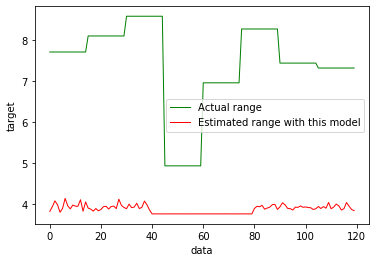

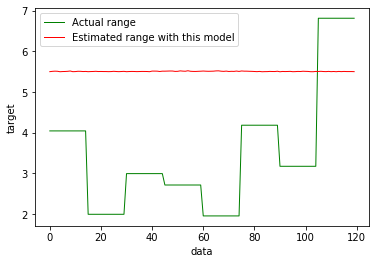

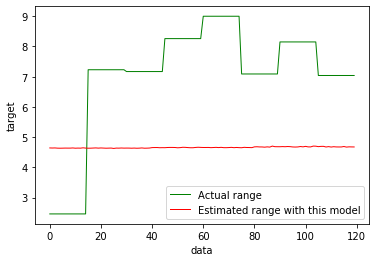

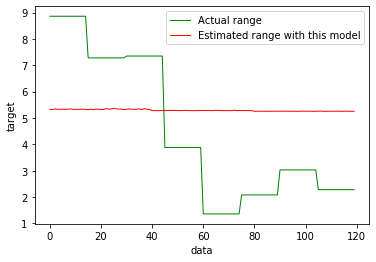

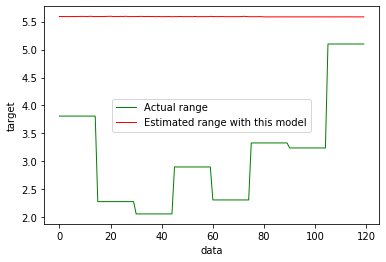


MAE of Ridge is = 2.785953
Best hyper-params for Ridge due to CV:
{'alpha': 1000}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.28673663460955, tolerance: 0.23384099374999984
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.5372969179705365, tolerance: 0.13609379374999991
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.35013835272213, tolerance: 0.19092374375
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.121425014

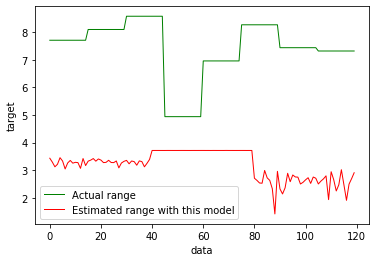

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.28673663460955, tolerance: 0.23384099374999984
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.44371505347598, tolerance: 0.22584944375000005
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.50711118249558, tolerance: 0.20087759375000006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162.006

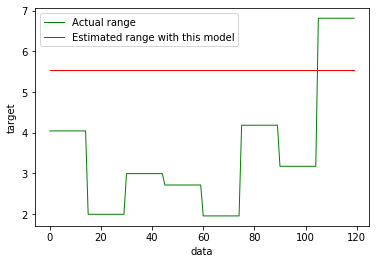

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.5372969179705365, tolerance: 0.13609379374999991
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.44371505347598, tolerance: 0.22584944375000005
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.40621409786496, tolerance: 0.18595439375000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.29840

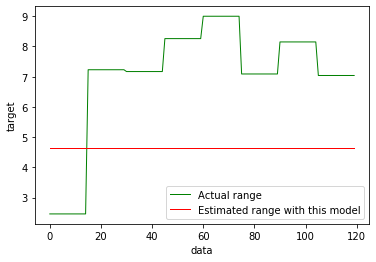

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.35013835272213, tolerance: 0.19092374375
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.50711118249558, tolerance: 0.20087759375000006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.40621409786496, tolerance: 0.18595439375000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.4264555125

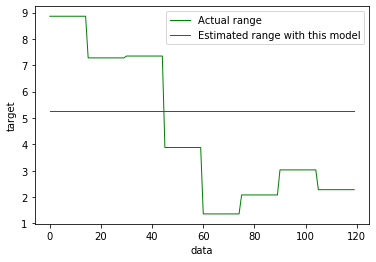

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.1214250147296, tolerance: 0.23550569999999976
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162.00664174358812, tolerance: 0.2018204
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.2984044145024995, tolerance: 0.22648850000000004
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.426455512555776

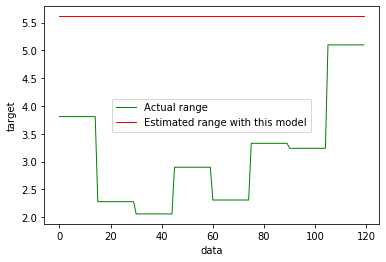


MAE of Lasso is = 2.942555
Best hyper-params for Lasso due to CV:
{'alpha': 1}


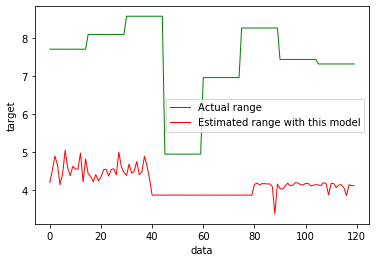

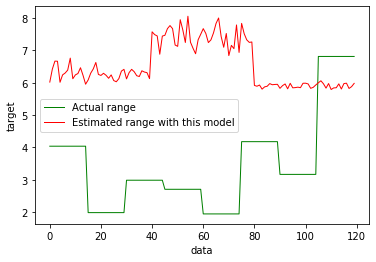

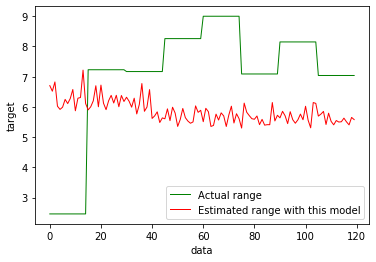

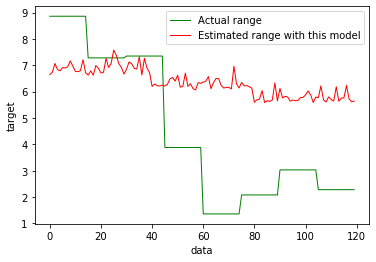

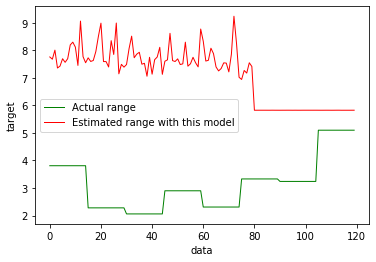


MAE of polynomial reg2 is = 3.048826


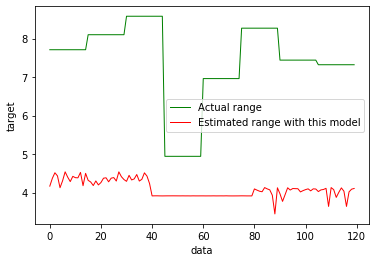

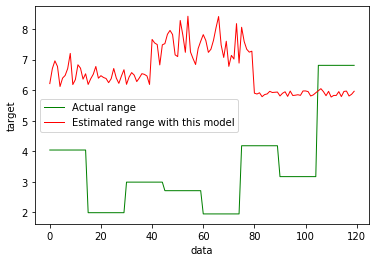

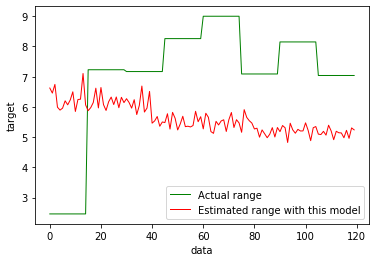

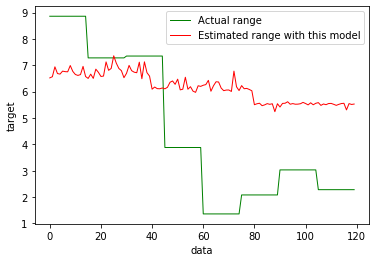

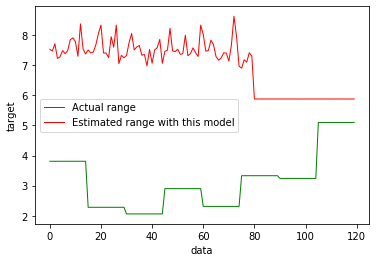


MAE of polynomial reg3 is = 3.083717


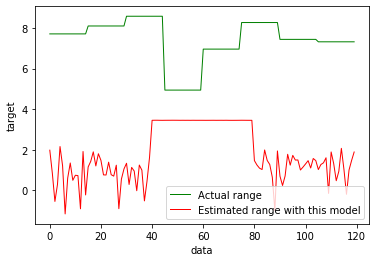

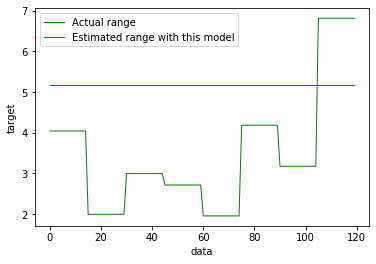

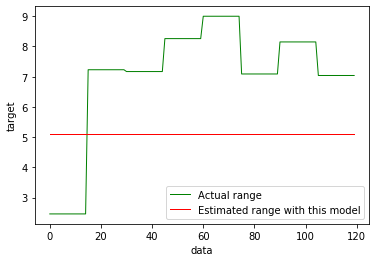

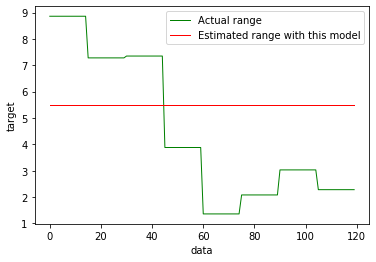

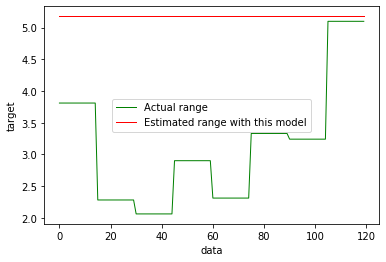


MAE of SVR is = 3.019175
Best hyper-params for SVR due to CV:
{'C': 0.0001, 'epsilon': 5, 'kernel': 'rbf'}


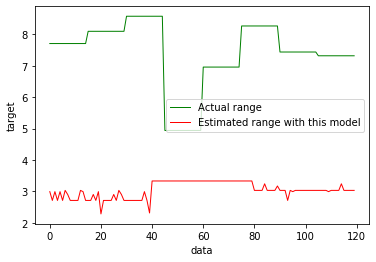

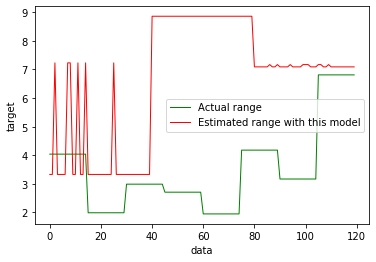

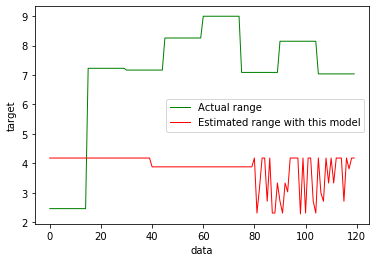

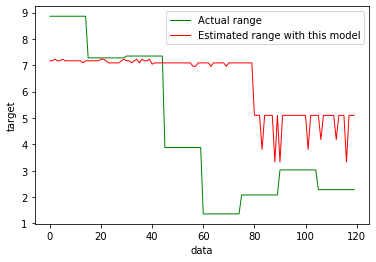

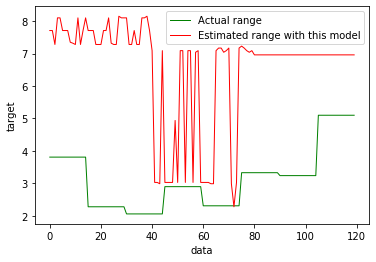


MAE of AdaBoost is = 3.413700
Best hyper-params for Adaboost due to CV:
{'n_estimators': 50}


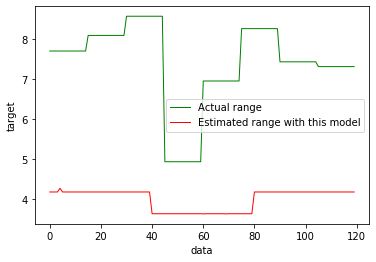

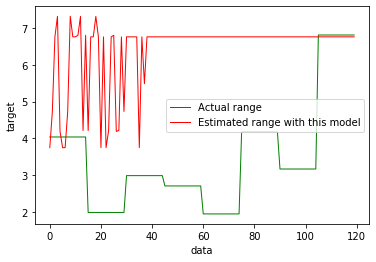

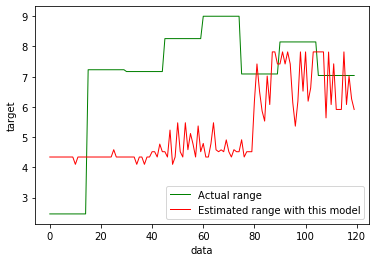

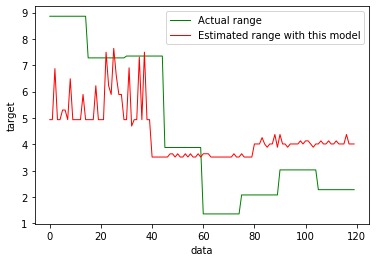

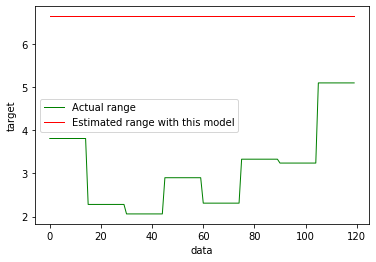


MAE of KNN is = 2.819601
Best hyper-params for KNN due to CV:
{'n_neighbors': 20}


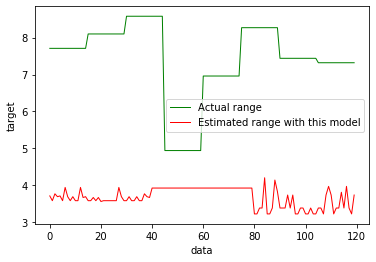

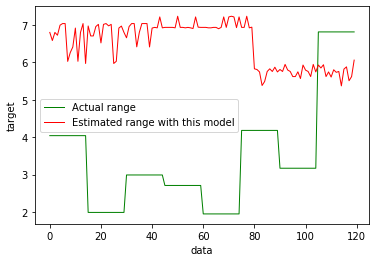

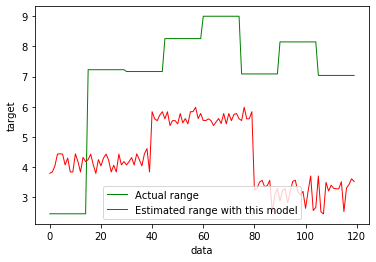

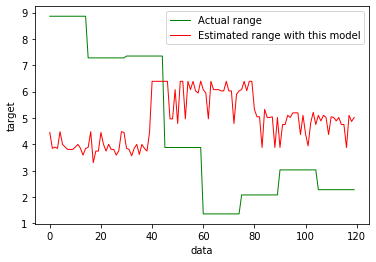

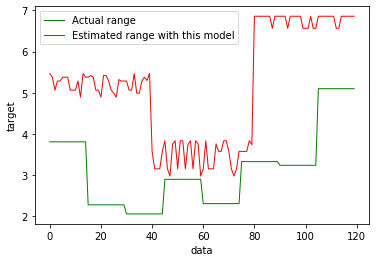


MAE of RandomForest is = 3.062123
Best hyper-params for RandomForest due to CV:
{'max_depth': 20, 'n_estimators': 10}


In [18]:
def main():
    X=X2
    y=y2_reg_v
    X = feature_extraction(X,y)
    X = data_cleaning(X)
    regr = lin_reg()
    MAE_linreg = cross_validation(X,y,regr)
    print('\nMAE of LinReg is = %f' % MAE_linreg)

    regr = ridge_reg()
    MAE_ridge = cross_validation(X,y,regr)
    print('\nMAE of Ridge is = %f' %  MAE_ridge)
    print('Best hyper-params for Ridge due to CV:')
    print(regr.best_params_)

    regr = lasso_reg()
    MAE_lasso = cross_validation(X,y,regr)
    print('\nMAE of Lasso is = %f' % MAE_lasso)
    print('Best hyper-params for Lasso due to CV:')
    print(regr.best_params_)

    regr = poly2_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg2 is = %f' % MAE_poly)


    regr = poly3_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg3 is = %f' % MAE_poly)


    # regr = poly4_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg4 is = %f' % MAE_poly)

    # regr = poly5_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg5 is = %f' % MAE_poly)

    regr = svr()
    MAE_svr = cross_validation(X,y,regr)
    print('\nMAE of SVR is = %f' % MAE_svr)
    print('Best hyper-params for SVR due to CV:')
    print(regr.best_params_)

    regr = AdaBoost()
    MAE_adaboost = cross_validation(X,y,regr)
    print('\nMAE of AdaBoost is = %f' %MAE_adaboost)
    print('Best hyper-params for Adaboost due to CV:')
    print(regr.best_params_)

    regr = KNN_reg()
    MAE_knn = cross_validation(X, y, regr)
    print('\nMAE of KNN is = %f' % MAE_knn)
    print('Best hyper-params for KNN due to CV:')
    print(regr.best_params_)

    regr = random_forest()
    MAE_forest = cross_validation(X, y, regr)
    print('\nMAE of RandomForest is = %f' % MAE_forest)
    print('Best hyper-params for RandomForest due to CV:')
    print(regr.best_params_)
##############################################################
main()

3 number of components remain for 95 percent energy in PCA.


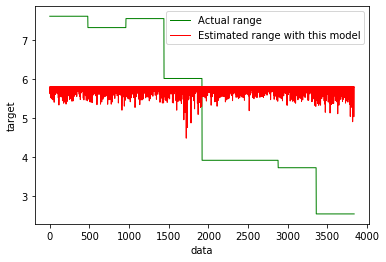

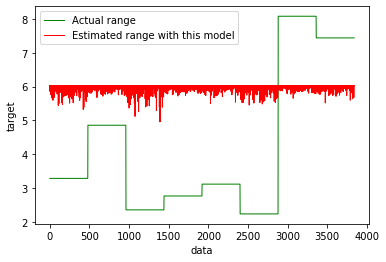

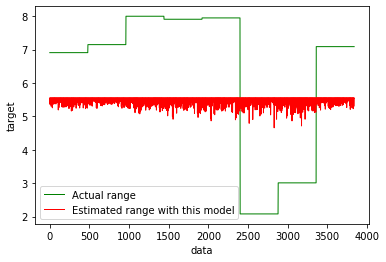

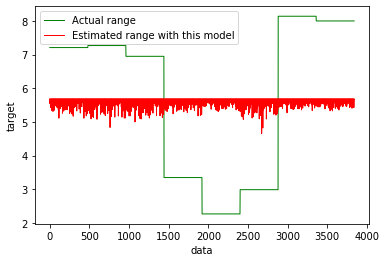

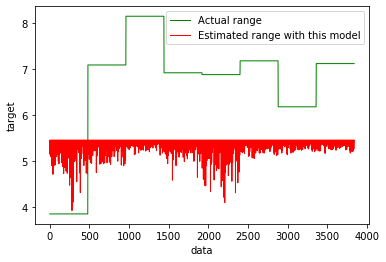


MAE of LinReg is = 2.097927


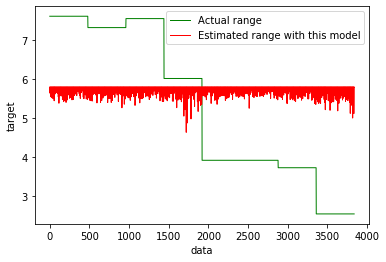

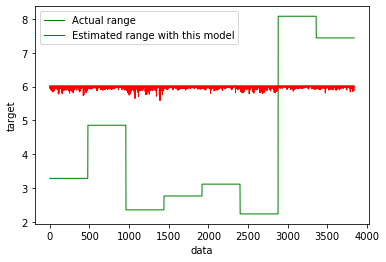

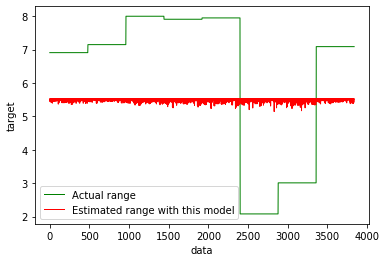

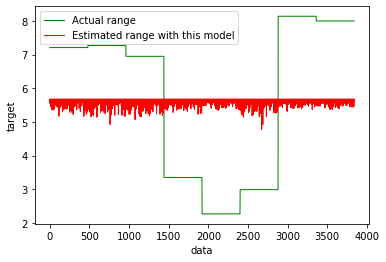

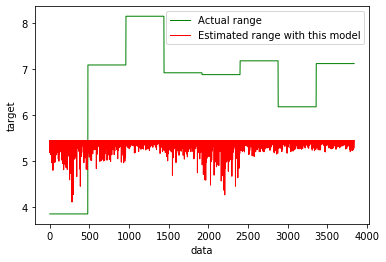


MAE of Ridge is = 2.099481
Best hyper-params for Ridge due to CV:
{'alpha': 0.1}


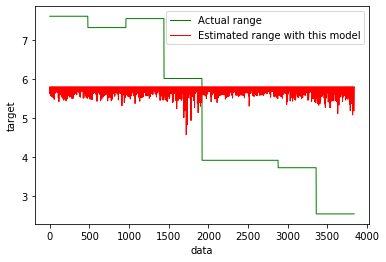

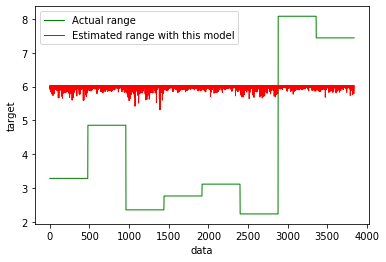

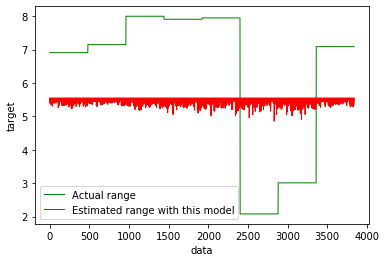

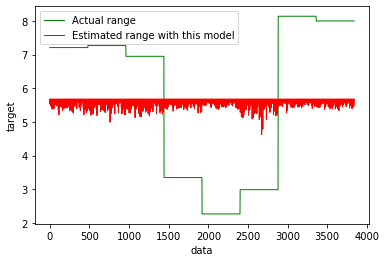

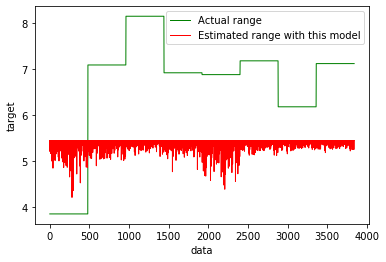


MAE of Lasso is = 2.098493
Best hyper-params for Lasso due to CV:
{'alpha': 0.0001}


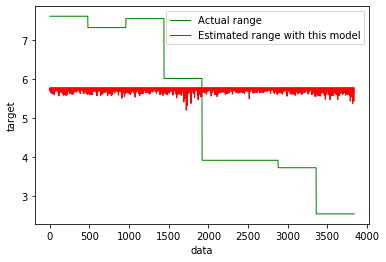

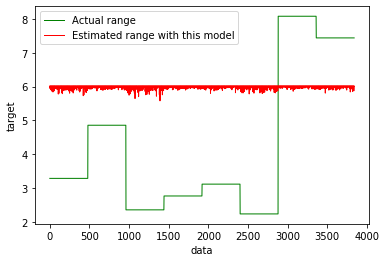

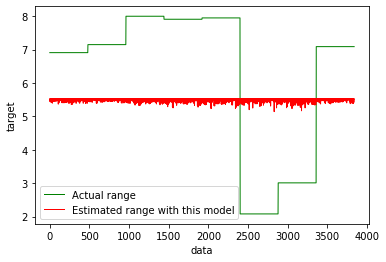

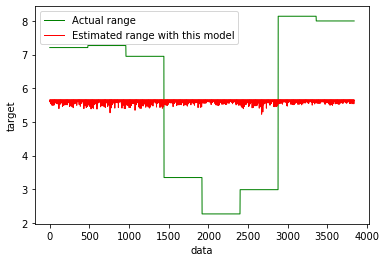

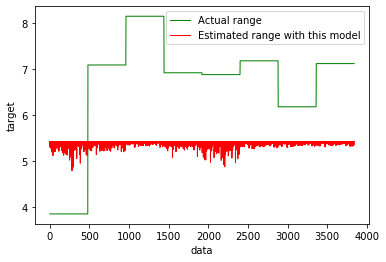


MAE of polynomial reg2 is = 2.100018


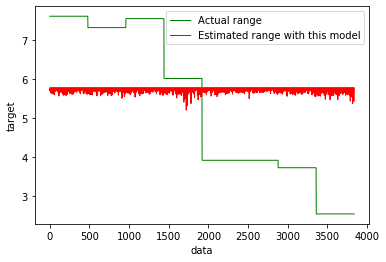

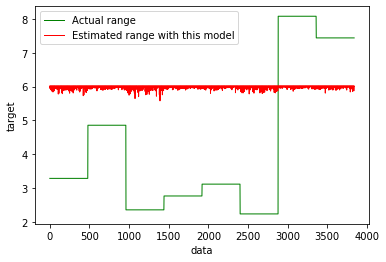

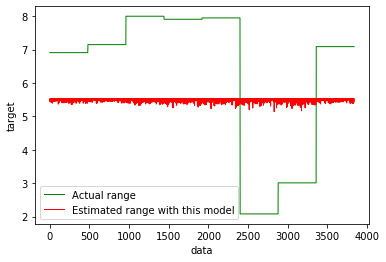

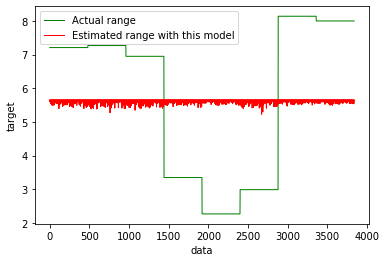

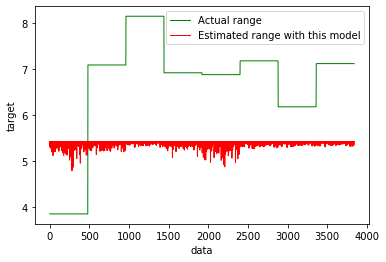


MAE of polynomial reg3 is = 2.100018


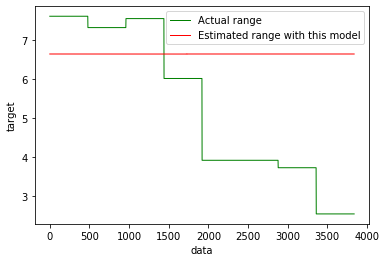

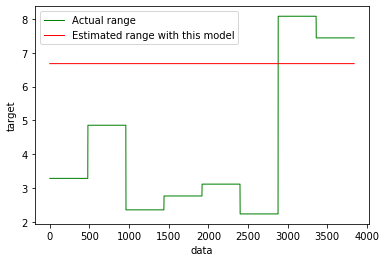

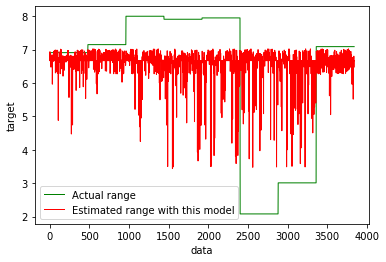

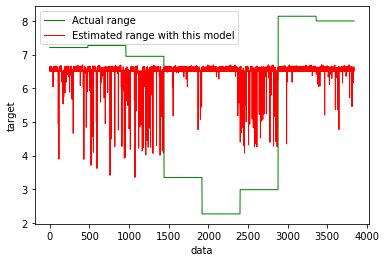

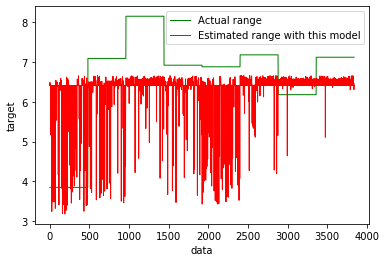


MAE of SVR is = 1.908484
Best hyper-params for SVR due to CV:
{'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}


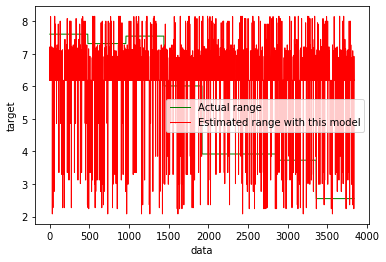

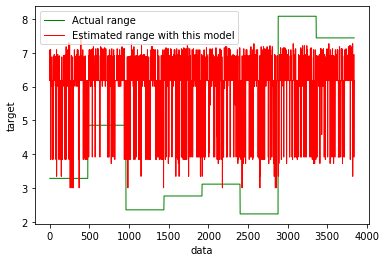

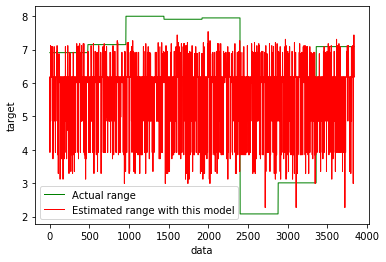

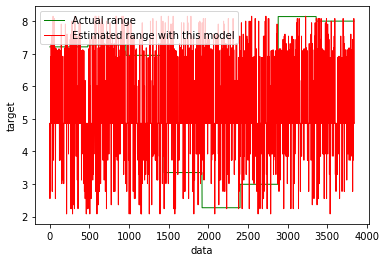

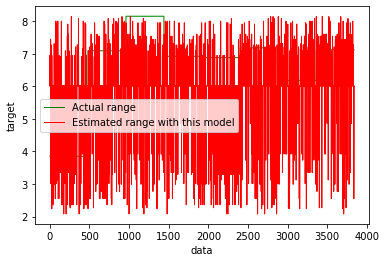


MAE of AdaBoost is = 2.074185
Best hyper-params for Adaboost due to CV:
{'n_estimators': 10}


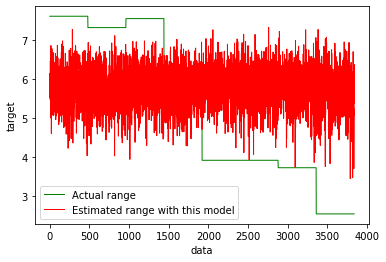

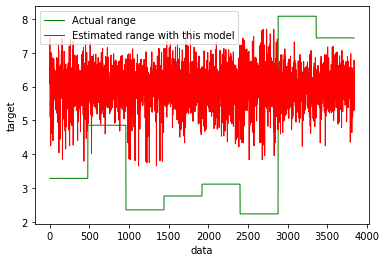

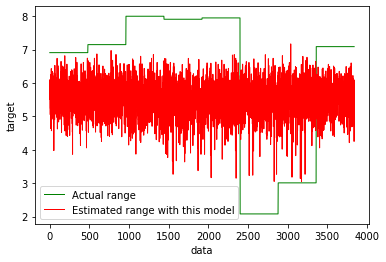

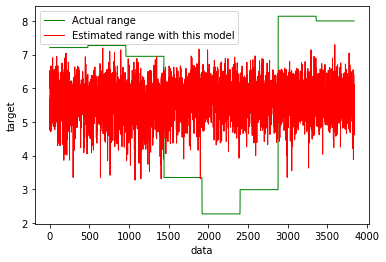

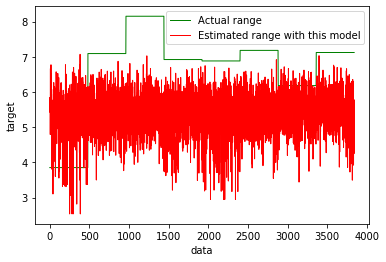


MAE of KNN is = 2.115779
Best hyper-params for KNN due to CV:
{'n_neighbors': 20}


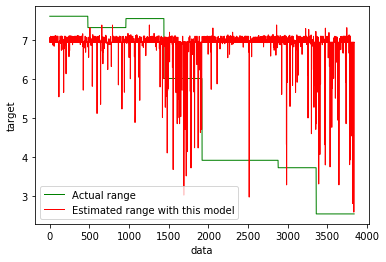

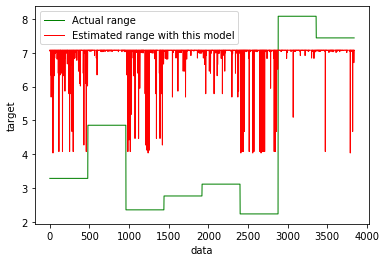

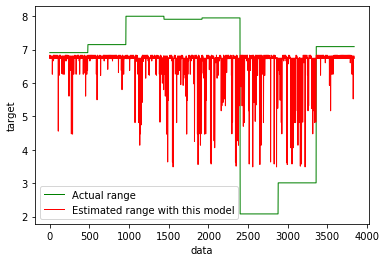

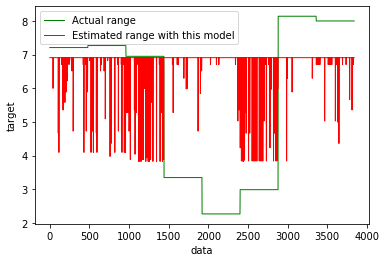

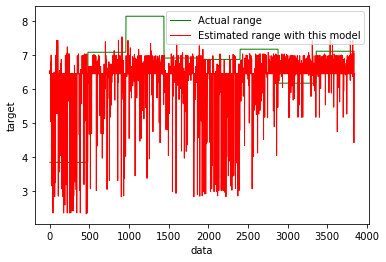


MAE of RandomForest is = 1.924109
Best hyper-params for RandomForest due to CV:
{'max_depth': 8, 'n_estimators': 10}


In [16]:
def main():
    X=X3
    y=y3_reg_a
    X = feature_extraction(X,y)
    X = data_cleaning(X)
    regr = lin_reg()
    MAE_linreg = cross_validation(X,y,regr)
    print('\nMAE of LinReg is = %f' % MAE_linreg)

    regr = ridge_reg()
    MAE_ridge = cross_validation(X,y,regr)
    print('\nMAE of Ridge is = %f' %  MAE_ridge)
    print('Best hyper-params for Ridge due to CV:')
    print(regr.best_params_)

    regr = lasso_reg()
    MAE_lasso = cross_validation(X,y,regr)
    print('\nMAE of Lasso is = %f' % MAE_lasso)
    print('Best hyper-params for Lasso due to CV:')
    print(regr.best_params_)

    regr = poly2_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg2 is = %f' % MAE_poly)


    regr = poly3_reg()
    MAE_poly = cross_validation(X,y,regr)
    print('\nMAE of polynomial reg3 is = %f' % MAE_poly)


    # regr = poly4_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg4 is = %f' % MAE_poly)

    # regr = poly5_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg5 is = %f' % MAE_poly)

    regr = svr()
    MAE_svr = cross_validation(X,y,regr)
    print('\nMAE of SVR is = %f' % MAE_svr)
    print('Best hyper-params for SVR due to CV:')
    print(regr.best_params_)

    regr = AdaBoost()
    MAE_adaboost = cross_validation(X,y,regr)
    print('\nMAE of AdaBoost is = %f' %MAE_adaboost)
    print('Best hyper-params for Adaboost due to CV:')
    print(regr.best_params_)

    regr = KNN_reg()
    MAE_knn = cross_validation(X, y, regr)
    print('\nMAE of KNN is = %f' % MAE_knn)
    print('Best hyper-params for KNN due to CV:')
    print(regr.best_params_)

    regr = random_forest()
    MAE_forest = cross_validation(X, y, regr)
    print('\nMAE of RandomForest is = %f' % MAE_forest)
    print('Best hyper-params for RandomForest due to CV:')
    print(regr.best_params_)
##############################################################
main()

3 number of components remain for 95 percent energy in PCA.


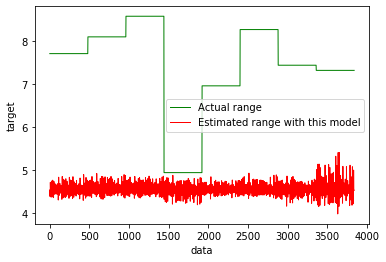

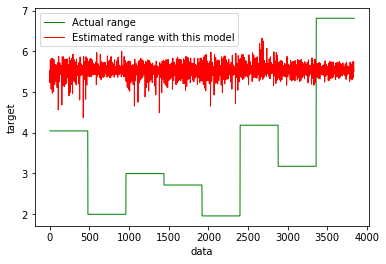

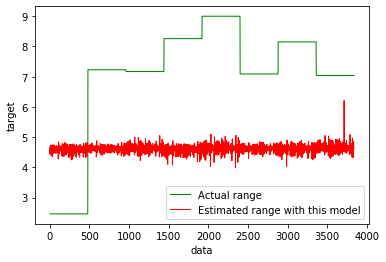

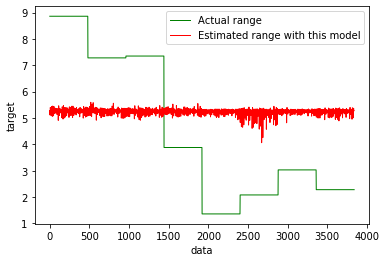

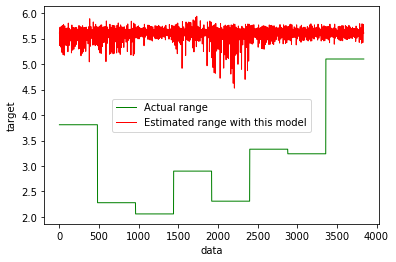


MAE of LinReg is = 2.669920


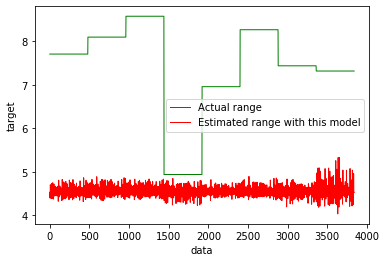

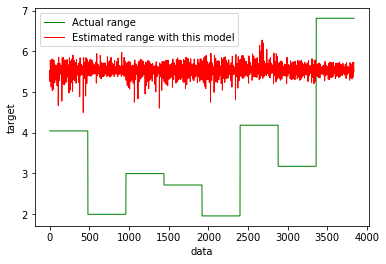

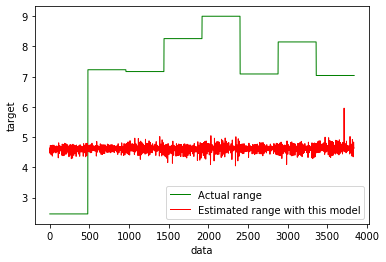

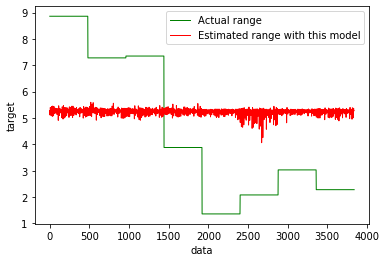

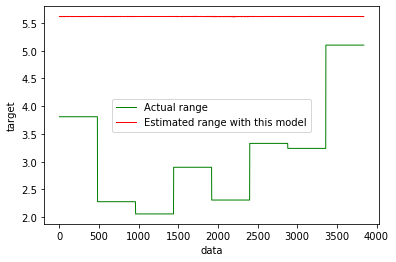


MAE of Ridge is = 2.670709
Best hyper-params for Ridge due to CV:
{'alpha': 100}


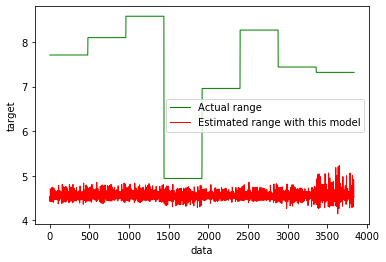

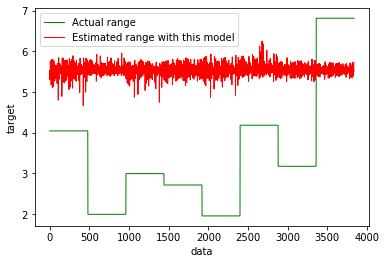

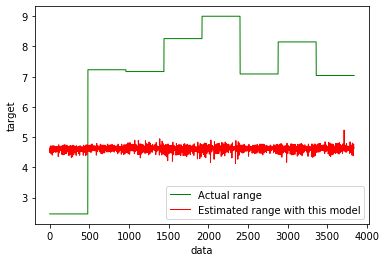

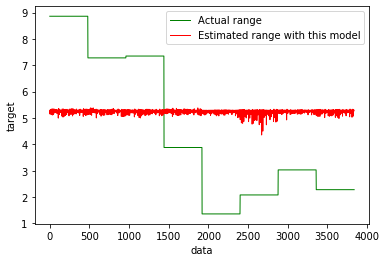

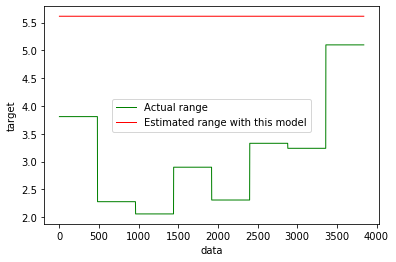


MAE of Lasso is = 2.671053
Best hyper-params for Lasso due to CV:
{'alpha': 0.001}


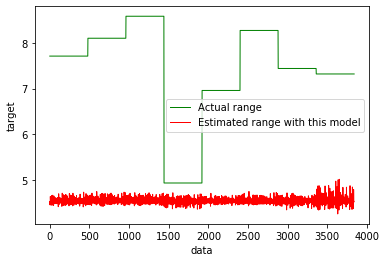

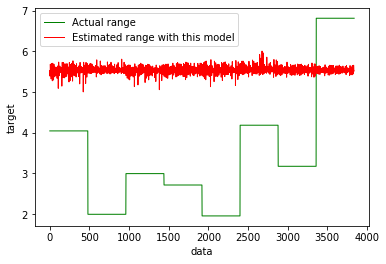

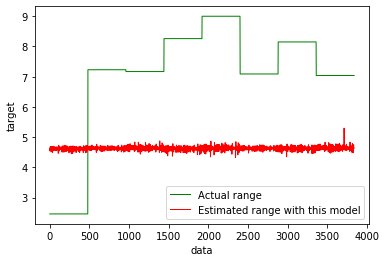

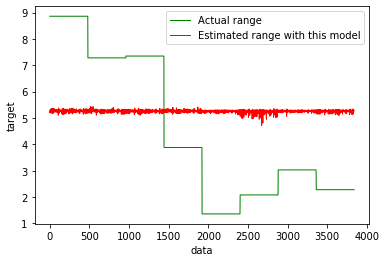

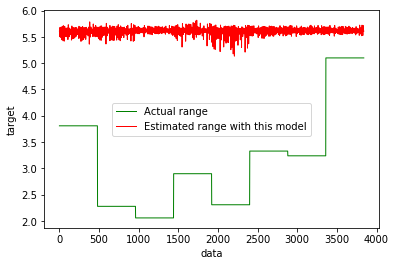


MAE of polynomial reg2 is = 2.670917


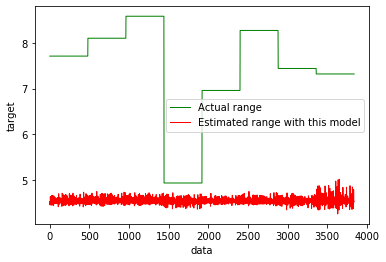

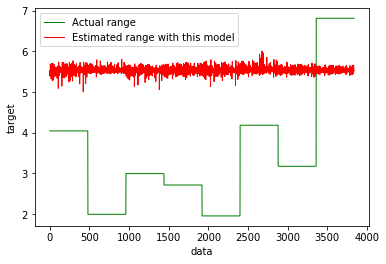

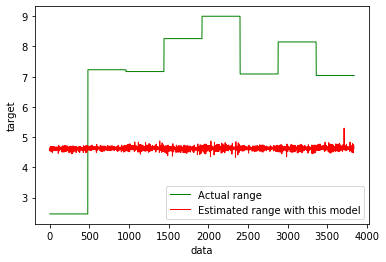

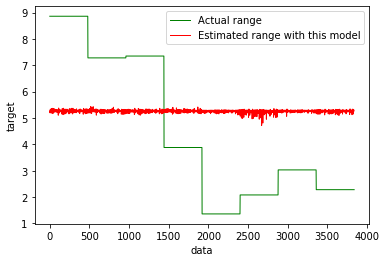

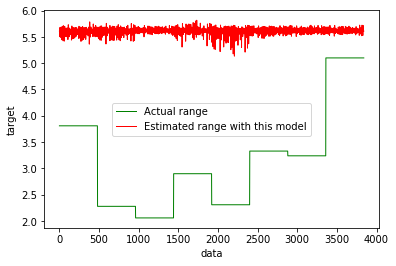


MAE of polynomial reg3 is = 2.670917


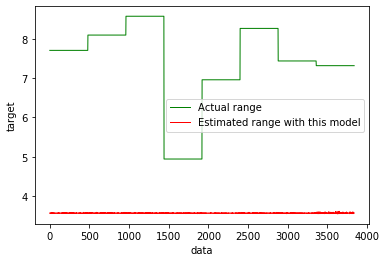

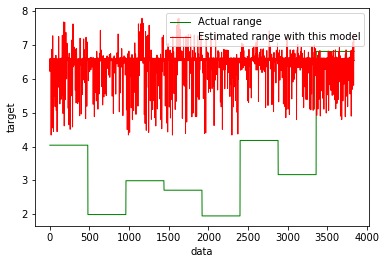

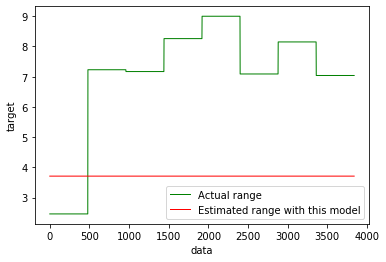

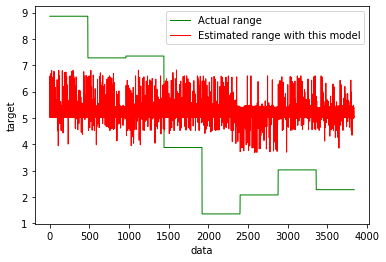

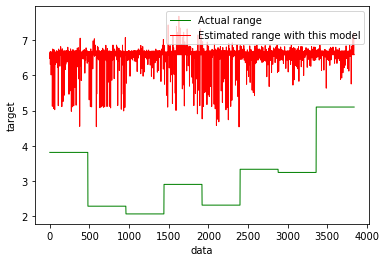


MAE of SVR is = 3.336379
Best hyper-params for SVR due to CV:
{'C': 0.1, 'epsilon': 0.5, 'kernel': 'rbf'}


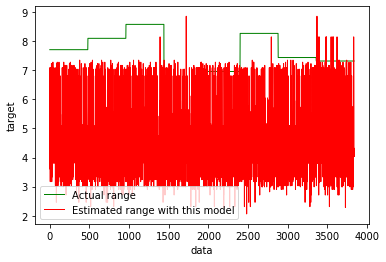

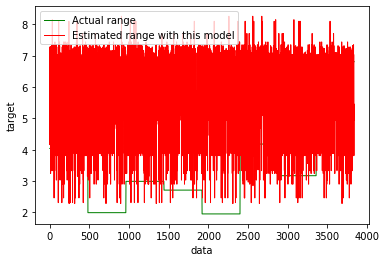

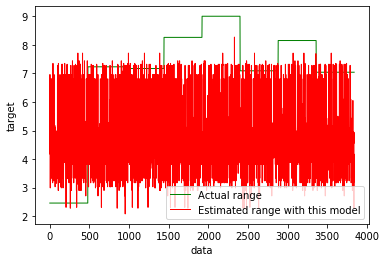

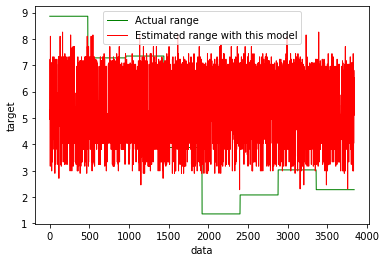

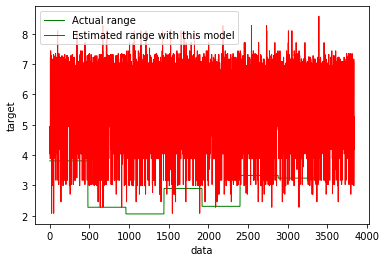


MAE of AdaBoost is = 2.647558
Best hyper-params for Adaboost due to CV:
{'n_estimators': 100}


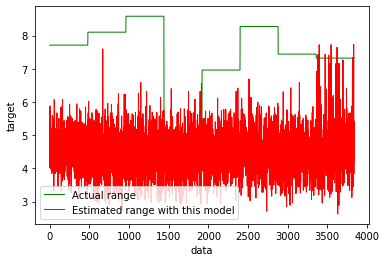

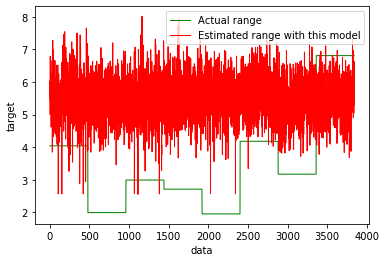

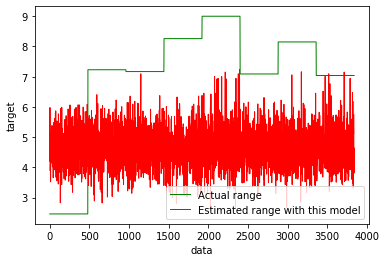

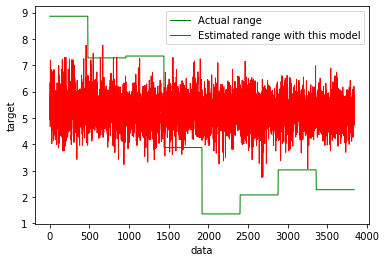

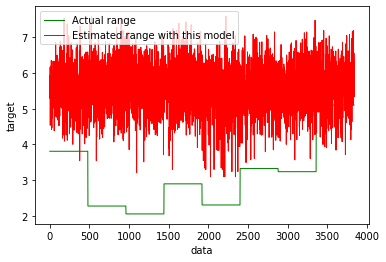


MAE of KNN is = 2.668883
Best hyper-params for KNN due to CV:
{'n_neighbors': 20}


In [0]:
def main():
    # X=X3
    # y=y3_reg_v
    # X = feature_extraction(X,y)
    # X = data_cleaning(X)
    # regr = lin_reg()
    # MAE_linreg = cross_validation(X,y,regr)
    # print('\nMAE of LinReg is = %f' % MAE_linreg)

    # regr = ridge_reg()
    # MAE_ridge = cross_validation(X,y,regr)
    # print('\nMAE of Ridge is = %f' %  MAE_ridge)
    # print('Best hyper-params for Ridge due to CV:')
    # print(regr.best_params_)

    # regr = lasso_reg()
    # MAE_lasso = cross_validation(X,y,regr)
    # print('\nMAE of Lasso is = %f' % MAE_lasso)
    # print('Best hyper-params for Lasso due to CV:')
    # print(regr.best_params_)

    # regr = poly2_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg2 is = %f' % MAE_poly)


    # regr = poly3_reg()
    # MAE_poly = cross_validation(X,y,regr)
    # print('\nMAE of polynomial reg3 is = %f' % MAE_poly)


    # # regr = poly4_reg()
    # # MAE_poly = cross_validation(X,y,regr)
    # # print('\nMAE of polynomial reg4 is = %f' % MAE_poly)

    # # regr = poly5_reg()
    # # MAE_poly = cross_validation(X,y,regr)
    # # print('\nMAE of polynomial reg5 is = %f' % MAE_poly)

    # regr = svr()
    # MAE_svr = cross_validation(X,y,regr)
    # print('\nMAE of SVR is = %f' % MAE_svr)
    # print('Best hyper-params for SVR due to CV:')
    # print(regr.best_params_)

    # regr = AdaBoost()
    # MAE_adaboost = cross_validation(X,y,regr)
    # print('\nMAE of AdaBoost is = %f' %MAE_adaboost)
    # print('Best hyper-params for Adaboost due to CV:')
    # print(regr.best_params_)

    # regr = KNN_reg()
    # MAE_knn = cross_validation(X, y, regr)
    # print('\nMAE of KNN is = %f' % MAE_knn)
    # print('Best hyper-params for KNN due to CV:')
    # print(regr.best_params_)

    regr = random_forest()
    MAE_forest = cross_validation(X, y, regr)
    print('\nMAE of RandomForest is = %f' % MAE_forest)
    print('Best hyper-params for RandomForest due to CV:')
    print(regr.best_params_)
##############################################################
main()

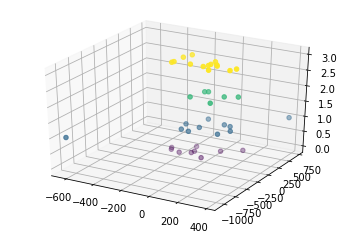

In [0]:
#visualize data by t-SNE method
def visualize(X, y):
    X_embedded = TSNE(n_components=3).fit_transform(X)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_embedded[:, 0], X_embedded[:, 1], y, c=y1)
visualize(X1,y1)

In [0]:
kfold =KFold(n_splits=5)
for train_index,test_index in kfold.split(X3):
  print('tr',train_index)
  print('t',test_index)

tr [ 3840  3841  3842 ... 19197 19198 19199]
t [   0    1    2 ... 3837 3838 3839]
tr [    0     1     2 ... 19197 19198 19199]
t [3840 3841 3842 ... 7677 7678 7679]
tr [    0     1     2 ... 19197 19198 19199]
t [ 7680  7681  7682 ... 11517 11518 11519]
tr [    0     1     2 ... 19197 19198 19199]
t [11520 11521 11522 ... 15357 15358 15359]
tr [    0     1     2 ... 15357 15358 15359]
t [15360 15361 15362 ... 19197 19198 19199]


In [0]:
def AdaBoost():
    parameters1 = {'max_depth': [3,5,7,10]}
    parameters2 = {'n_estimators': [20,50,70,100,150]}
    model1 = DecisionTreeRegressor(criterion = 'mae')
    base_regr = GridSearchCV(model1, parameters1, cv=8)
    model2 = AdaBoostRegressor(base_estimator = model1,learning_rate = 1)
    regr = GridSearchCV(model2, parameters2, cv=8)
    return regr
regr=AdaBoost()
cross_validation(X3,y3,regr)

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=15, step=1)
rfe.fit(X1, y)